<a href="https://colab.research.google.com/github/NoeliaFerrero/NLP/blob/main/Proyecto_DS_COMERCIO_Analisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Proyecto DS Actividad Económica-Geográfica**


**Fecha inicio: Marzo 2022**


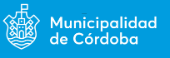

## Objetivos
- Introducir las funciones necesarias para una exploracion inicial del dataset
- Trabajar con funciones estadisticas que permitan obtener una descripcion más gráfica de las observaciones 
- Pensar preguntas, problemas y variables de interés 
- Descubrir un primer insight que aporte valor al analisis
------------------------------------------------------------------------------
- Para efectuar el análisis se consideran solamente 3 años del dataset: 
 
  -2005: el más antiguo y de fácil comparación.

  -2013: el año de máximo PBG del Departamento Capital.

  -2019: el último año del cual se dispone informacion completa.
- Para el trabajo de georeferenciación, en una primera instancia, se tendra en cuenta el dato de C.P.C. y Barrio. 


## Importación de librerías

In [ ]:
#pandasql permite consultar pandas DataFrames utilizando la sintaxis SQL, sin instalar o conectarse a un servidor SQL.
#Esta libreria simplifica la extracción y el análisis de datos complejos, ya que proporciona una forma más familiar de manipular y limpiar dichos datos.
!pip install pandasql
from pandasql import sqldf 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=985753316048e61ff3fcb8bd415a86d1aedf8718436631dbec5a113b28e93ab3
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
#!pip install pandas
#!pip uninstall pandas
#!pip install "pandas ==0.25.3"
#%pylab inline 

In [ ]:
import io
import numpy as np 
import pandas as pd 
from datetime import date, datetime, timedelta
import re
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use ('ggplot')
pd.set_option ('max_columns',27)

In [ ]:
#!pip install --upgrade folium==0.2.1

In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 2.0 MB/s 
     |████████████████████████████████| 596 kB 13.2 MB/s 
     |████████████████████████████████| 102 kB 41.3 MB/s 
     |████████████████████████████████| 690 kB 40.8 MB/s 
     |████████████████████████████████| 4.7 MB 47.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 51.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=aea46f91e641c5c4a6d41dfa67c3fe9db7ce40d5399c99a673303a6e9de5e9b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-pq4tpbwx/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a9c16d33148a4a2291cec8477573a4bb974f26d2dbf4fb699ec824a2ea9aa5cc
  Stored in directory: /root/.cache/pip/whe

In [ ]:
#!pip install pyyaml==5.4.1

In [ ]:
#!pip install -U pandas-profiling

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lectura del Dataset con los Comercios

In [ ]:
# Drive Noe
read_file = pd.read_excel("/content/drive/MyDrive/Proyecto_DS_COME/Mega Archivo.xlsx")   
read_file.to_csv ("/content/drive/MyDrive/Proyecto_DS_COME/DataSetComercios.csv",index=None, header=True)
!head /content/drive/MyDrive/Proyecto_DS_COME/DataSetComercios.csv
df = pd.read_csv ("/content/drive/MyDrive/Proyecto_DS_COME/DataSetComercios.csv")  

CODCOMERCIO,CUIT,CONOMB,COTCTE,COFINI,COFCES,COCALL,CONUME,COPISO,CODPTO,COCBAR,COLOCX,COCATAS,COSUCU,COSECC,COCACT,COCONV,COCENT,COFCDO,CONOMBF,COMOTRI,RUBRO,SUBRUBRO,DESCRIPRUBRO,CATEGORIARUBRO,FECHAALTARUBRO,FECHABAJARUBRO
000,20000000001,LOPEZ BERNAL FERNANDO LUIS    ,2,19830201,00000000,DUARTE QUIROS                 ,03124,   ,    ,009,ALTO ALBERDI                  ,000000000000000,000,  ,1 ,0,0,19841101,                                                                                , ,085141,0,                                                  ,00,19830101,20041231
000,20000000001,LOPEZ BERNAL FERNANDO LUIS    ,2,19830201,00000000,DUARTE QUIROS                 ,03124,   ,    ,009,ALTO ALBERDI                  ,000000000000000,000,  ,1 ,0,0,19841101,                                                                                , ,502220,0,REPAR.DE AUTOMOTORES Y MOTOCICLETAS(AMORT.ALINEAC.,12,20150101,00000000
000,20000000001,LOPEZ BERNAL FERNANDO LUIS    ,2,19830201,00000000,DUART

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,12,13,15,18,21,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Drive Caro
read_file = pd.read_excel("/content/drive/MyDrive/ProyectoComercio/Mega Archivo.xlsx")    
read_file.to_csv ("/content/drive/MyDrive/ProyectoComercio/DataSetComercios.csv",index=None, header=True)
!head /content/drive/MyDrive/ProyectoComercio/DataSetComercios.csv
df = pd.read_csv ("/content/drive/MyDrive/ProyectoComercio/DataSetComercios.csv")

CODCOMERCIO,CUIT,CONOMB,COTCTE,COFINI,COFCES,COCALL,CONUME,COPISO,CODPTO,COCBAR,COLOCX,COCATAS,COSUCU,COSECC,COCACT,COCONV,COCENT,COFCDO,CONOMBF,COMOTRI,RUBRO,SUBRUBRO,DESCRIPRUBRO,CATEGORIARUBRO,FECHAALTARUBRO,FECHABAJARUBRO
000,20000000001,LOPEZ BERNAL FERNANDO LUIS    ,2,19830201,00000000,DUARTE QUIROS                 ,03124,   ,    ,009,ALTO ALBERDI                  ,000000000000000,000,  ,1 ,0,0,19841101,                                                                                , ,085141,0,                                                  ,00,19830101,20041231
000,20000000001,LOPEZ BERNAL FERNANDO LUIS    ,2,19830201,00000000,DUARTE QUIROS                 ,03124,   ,    ,009,ALTO ALBERDI                  ,000000000000000,000,  ,1 ,0,0,19841101,                                                                                , ,502220,0,REPAR.DE AUTOMOTORES Y MOTOCICLETAS(AMORT.ALINEAC.,12,20150101,00000000
000,20000000001,LOPEZ BERNAL FERNANDO LUIS    ,2,19830201,00000000,DUART

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,12,13,15,18,21,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Primeras y últimas 5 filas del dataset

In [ ]:
df.head()

,CODCOMERCIO,CUIT,CONOMB,COTCTE,COFINI,COFCES,COCALL,CONUME,COPISO,CODPTO,COCBAR,COLOCX,COCATAS,COSUCU,COSECC,COCACT,COCONV,COCENT,COFCDO,CONOMBF,COMOTRI,RUBRO,SUBRUBRO,DESCRIPRUBRO,CATEGORIARUBRO,FECHAALTARUBRO,FECHABAJARUBRO
0,0,20000000001,LOPEZ BERNAL FERNANDO LUIS,2,19830201,00000000,DUARTE QUIROS,03124,,,009,ALTO ALBERDI,0,0,,1,0,0,19841101,...,,85141,0,...,00,19830101,20041231
1,0,20000000001,LOPEZ BERNAL FERNANDO LUIS,2,19830201,00000000,DUARTE QUIROS,03124,,,009,ALTO ALBERDI,0,0,,1,0,0,19841101,...,,502220,0,REPAR.DE AUTOMOTORES Y MOTOCICLETAS(AMORT.ALIN...,12,20150101,00000000
2,0,20000000001,LOPEZ BERNAL FERNANDO LUIS,2,19830201,00000000,DUARTE QUIROS,03124,,,009,ALTO ALBERDI,0,0,,1,0,0,19841101,...,,502990,0,REPAR.DE AUT Y MOTO MEC.INTEGRAL.INCLUYE INST ...,12,20150101,00000000
3,0,20000003930,ALTERMAN EDUARDO ABRAHAM,2,19881101,00000000,CASTRO BARROS,00317,,,228,SAN MARTIN,10100100100001,0,,4,0,0,00000000,...,,61241,0,...,00,19881101,20041231
4,0,20000003930,ALTERMAN EDUARDO ABRAHAM,2,19881101,00000000,CASTRO BARROS,00317,,,228,SAN MARTIN,10100100100001,0,,4,0,0,00000000,...,,61241,0,...,00,19881101,20041231


In [ ]:
df.tail()

,CODCOMERCIO,CUIT,CONOMB,COTCTE,COFINI,COFCES,COCALL,CONUME,COPISO,CODPTO,COCBAR,COLOCX,COCATAS,COSUCU,COSECC,COCACT,COCONV,COCENT,COFCDO,CONOMBF,COMOTRI,RUBRO,SUBRUBRO,DESCRIPRUBRO,CATEGORIARUBRO,FECHAALTARUBRO,FECHABAJARUBRO
518279,0,34682333342,PERONA HNOS SRL,4,19960101,00000000,POTOSI,01239,,,201,GRAL.PUEYRREDON,11500903300000,0,08,1,0,8,0,...,,23111,0,...,00,19960101,20041231
518280,0,34682333342,PERONA HNOS SRL,4,19960101,00000000,POTOSI,01239,,,201,GRAL.PUEYRREDON,11500903300000,0,08,1,0,8,0,...,,23111,0,...,00,19960101,20041231
518281,0,34682333342,PERONA HNOS SRL,4,19960101,00000000,POTOSI,01239,,,201,GRAL.PUEYRREDON,11500903300000,0,08,1,0,8,0,...,,192010,1,"FAB. DE CALZADIO DE CUERO,INCLUY.ORTOPEDICO ...",02,20050101,00000000
518282,0,34685433364,COOP.TRAB.EL HALCON LTDA,2,19960601,00000000,AV GENERAL PAZ,00159,1,130,047,CENTRO,40205204000105,0,00,5,0,9,0,...,,82999,0,...,00,19960601,20041231
518283,0,34687633328,MANSILLA Y TELLO S.H.,2,19970214,00000000,ASCOCHINGA,00844,,,095,HIPOL.IRIGOYEN,150903000900000,0,25,5,0,0,0,...,,61299,0,...,00,19970214,20041231


## Lectura del Dataset con los Barrios

In [ ]:
# Drive Noe p/leer archivo de Barrios
read_file = pd.read_csv("/content/drive/MyDrive/Proyecto_DS_COME/Barrios_modif.txt")   
read_file.to_csv ("/content/drive/MyDrive/Proyecto_DS_COME/Barrios_modif.csv",index=None, header=True)
!head /content/drive/MyDrive/Proyecto_DS_COME/Barrios_modif.csv
df_barrios = pd.read_csv ("/content/drive/MyDrive/Proyecto_DS_COME/Barrios_modif.csv",sep=';')  

cod;desvrip        ;post ;cp
001;ACOSTA         ;05006;07
003;AERONAUTICO    ;05103;05
004;ALBERDI        ;05000;10
005;ALEJ.CENTENO   ;05009;03
006;ALT.V.SARSFIELD;05016;06
007;ALTA CORDOBA   ;05000;01
008;ALTAMIRA       ;05006;07
009;ALTO ALBERDI   ;05003;04
010;ALTO GRAL.PAZ  ;05000;08


In [ ]:
# Drive Caro p/leer archivo de Barrios
read_file = pd.read_csv("/content/drive/MyDrive/ProyectoComercio/Barrios_modif.txt")   
read_file.to_csv ("/content/drive/MyDrive/ProyectoComercio/Barrios_modif.csv",index=None, header=True)
!head /content/drive/MyDrive/ProyectoComercio/Barrios_modif.csv
df_barrios = pd.read_csv ("/content/drive/MyDrive/ProyectoComercio/Barrios_modif.csv",sep=';')  

cod;desvrip        ;post ;cp
001;ACOSTA         ;05006;07
003;AERONAUTICO    ;05103;05
004;ALBERDI        ;05000;10
005;ALEJ.CENTENO   ;05009;03
006;ALT.V.SARSFIELD;05016;06
007;ALTA CORDOBA   ;05000;01
008;ALTAMIRA       ;05006;07
009;ALTO ALBERDI   ;05003;04
010;ALTO GRAL.PAZ  ;05000;08


In [ ]:
df_barrios.head()

,cod,desvrip,post,cp
0,001,ACOSTA,05006,07
1,003,AERONAUTICO,05103,05
2,004,ALBERDI,05000,10
3,005,ALEJ.CENTENO,05009,03
4,006,ALT.V.SARSFIELD,05016,06


In [ ]:
df_barrios.rename(columns={'cod': 'Cod_Barrio', 
           'desvrip        ': 'Descrip_Barrio', 
           'post ': 'Cod_Postal',
           'cp': 'Cod_CPC'},
           inplace = True)

In [ ]:
#df_barrios.columns = ['Cod_Barrio', 'Descrip_Barrio', 'Cod_Postal', 'Cod_CPC'] 
print(df_barrios)

    Cod_Barrio   Descrip_Barrio Cod_Postal Cod_CPC
0          001  ACOSTA               05006      07
1          003  AERONAUTICO          05103      05
2          004  ALBERDI              05000      10
3          005  ALEJ.CENTENO         05009      03
4          006  ALT.V.SARSFIELD      05016      06
..         ...              ...        ...     ...
485        996  MERC.FRUTI-HORT      05000      08
486        997  MERCADO NORTE        05000      10
487        998  MERCADO SUD          05000      10
488        999  SIN NOMBRE           05000      00
489             SIN DESCRIP                       

[490 rows x 4 columns]


In [ ]:
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cod_Barrio      490 non-null    object
 1   Descrip_Barrio  490 non-null    object
 2   Cod_Postal      490 non-null    object
 3   Cod_CPC         490 non-null    object
dtypes: object(4)
memory usage: 15.4+ KB


## Análisis Exploratorio de Datos 

El EDA (en referencia a sus siglas en inglés) constará de una primera revisión del estado de los datos y los consecuentes pasos necesarios para una correcta transformación. Es decir, se trabajará con los datos crudos, para convertirlos  en entendimiento, comprensión y conocimiento. En este sentido, el primer objetivo consiste en preguntarnos **¿De que se trata este dataset?**

<center>
<img src="https://i.imgur.com/jclXnDS.png" height="150" />
</center>





### Proceso de ETL(extracción, transformacion y carga), de los datos
Este proyecto esta basado en un Set de datos obtenido del Sistema Tributario de Comercio e Industria. Las tablas de origen, son las que se detallan a continuación:

* COCTE: Padrón de Contribuyentes 
* COSUCURSAL: Sucursales del Contribuyente    
* CTERUBROS: Rubros del Contribuyente  
* COHISTOR: Contribuyentes pasado a historico 
* CORUBROS: Padrón de Rubros



Valores que puede contener la Columna CODCOMERCIO:

- Si la Columna **CODCOMERCIO** es igual a 0 --> el comercio es **Casa central**

- Si la Columna **CODCOMERCIO** es mayor a 0 --> el comercio es **Sucursal**

En la Columna **COSUCU** se indica la **Cantidad** de **Sucursales** que posee una casa central 

---
Detalle de las caracteristicas del Dataset
1. Tipos de datos que posee la tabla (en funcion de las variables)
2. Dimensiones del dataset --> cantidad de observaciones (filas) y atributos (columnas)
3. Posibles unidades de análisis
---


In [ ]:
print('Cantidad de Filas y columnas del DataSet de Comercios:', df.shape)

Cantidad de Filas y columnas del DataSet de Comercios: (518284, 27)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518284 entries, 0 to 518283
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CODCOMERCIO     518284 non-null  object
 1   CUIT            518284 non-null  int64 
 2   CONOMB          518284 non-null  object
 3   COTCTE          518284 non-null  int64 
 4   COFINI          518284 non-null  int64 
 5   COFCES          518284 non-null  object
 6   COCALL          518284 non-null  object
 7   CONUME          518284 non-null  object
 8   COPISO          518284 non-null  object
 9   CODPTO          517765 non-null  object
 10  COCBAR          518284 non-null  object
 11  COLOCX          518284 non-null  object
 12  COCATAS         518284 non-null  object
 13  COSUCU          518284 non-null  object
 14  COSECC          518284 non-null  object
 15  COCACT          518284 non-null  object
 16  COCONV          518284 non-null  object
 17  COCENT          518284 non-nu

Deteccion de datos **nulos**

Vamos a buscar cuantos campos tienen algun valor nulo (NaN)

In [ ]:
df.isnull().sum()

CODCOMERCIO           0
CUIT                  0
CONOMB                0
COTCTE                0
COFINI                0
COFCES                0
COCALL                0
CONUME                0
COPISO                0
CODPTO              519
COCBAR                0
COLOCX                0
COCATAS               0
COSUCU                0
COSECC                0
COCACT                0
COCONV                0
COCENT                0
COFCDO                0
CONOMBF               0
COMOTRI               0
RUBRO                 0
SUBRUBRO              0
DESCRIPRUBRO      21811
CATEGORIARUBRO    21811
FECHAALTARUBRO        0
FECHABAJARUBRO        0
dtype: int64

In [ ]:
df.isna().sum()

CODCOMERCIO           0
CUIT                  0
CONOMB                0
COTCTE                0
COFINI                0
COFCES                0
COCALL                0
CONUME                0
COPISO                0
CODPTO              519
COCBAR                0
COLOCX                0
COCATAS               0
COSUCU                0
COSECC                0
COCACT                0
COCONV                0
COCENT                0
COFCDO                0
CONOMBF               0
COMOTRI               0
RUBRO                 0
SUBRUBRO              0
DESCRIPRUBRO      21811
CATEGORIARUBRO    21811
FECHAALTARUBRO        0
FECHABAJARUBRO        0
dtype: int64

### Comercios con fecha de Inicio posterior al 31/12/2004

Se filtran los Comercios que tienen fecha de Alta anterior al 2005, con lo cual, el dataset bajo estudio se reduce considerablemente (quedando 188.504 observaciones para el presente analisis). 

In [ ]:
#escribimos una función lambda que hará que escribir una consulta sea más rápido
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
query = """ 
          select * 
          from df 
          where (COFINI > 20041231)
          """

In [ ]:
df_query = pysqldf(query)

In [ ]:
df_query.shape

(188504, 27)

In [ ]:
df_query.head()

,CODCOMERCIO,CUIT,CONOMB,COTCTE,COFINI,COFCES,COCALL,CONUME,COPISO,CODPTO,COCBAR,COLOCX,COCATAS,COSUCU,COSECC,COCACT,COCONV,COCENT,COFCDO,CONOMBF,COMOTRI,RUBRO,SUBRUBRO,DESCRIPRUBRO,CATEGORIARUBRO,FECHAALTARUBRO,FECHABAJARUBRO
0,0,20000708748,224089644BOBER PABLO LUIS,2,20120801,00000000,GARIBALDI,00318,,,081,GENERAL PAZ,12704501900000,0,00,5,0,0,00000000,224089644BOBER PABLO LUIS ...,,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,20120801,00000000
1,0,20007763426,RODRIGUEZ ROJAS MACEDONIO,2,20131119,00000000,ARMADA ARGENTINA,00983,,,181,PARQUE LATINO,300900400300000,0,00,5,0,0,00000000,RODRIGUEZ ROJAS MACEDONIO ...,,502210,0,TALLER DE GOMERIA. ...,12,20131119,00000000
2,0,20017056361,SAQUI CARLOS ALBERTO,2,20160601,00000000,AV MANUEL SAVIO,04125,,,493,4 DE FEBRERO,261400205300000,0,00,5,0,0,00000000,SAQUI CARLOS ALBERTO ...,,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,20160601,00000000
3,0,20018193605,USTARES MARCELO EDMUNDO,2,20060202,00000000,CHUBUT,00047,,,004,ALBERDI,40104601300000,0,00,5,0,0,00000000,...,,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,20060202,00000000
4,0,20027130993,PALACIOS AURELIO,2,20050901,00000000,AV COLON,00010,02,32,047,CENTRO,40204901700032,0,00,5,0,0,00000000,...,,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,20050901,00000000


In [ ]:
# Seleccionamos los distintos establecimientos convinando el cod. del comercio + cuit
query_distintos = """ 
          select DISTINCT * 
          from df_query
          GROUP BY CODCOMERCIO,CUIT
          ORDER BY CODCOMERCIO,CUIT asc
          """

In [ ]:
df_distin = pysqldf(query_distintos)

In [ ]:
df_distin.shape #este dataframe contiene UN solo registro por establecim (se usa para trabajar con los datos fijos --> tipo contrib, fecha alta, fecha baja y domicilio)

(91202, 27)

In [ ]:
df_distin.head()

,CODCOMERCIO,CUIT,CONOMB,COTCTE,COFINI,COFCES,COCALL,CONUME,COPISO,CODPTO,COCBAR,COLOCX,COCATAS,COSUCU,COSECC,COCACT,COCONV,COCENT,COFCDO,CONOMBF,COMOTRI,RUBRO,SUBRUBRO,DESCRIPRUBRO,CATEGORIARUBRO,FECHAALTARUBRO,FECHABAJARUBRO
0,0,20000708748,BOBER PABLO LUIS,2,20120801,00000000,GARIBALDI,00318,,,081,GENERAL PAZ,12704501900000,0,00,5,0,0,00000000,224089644BOBER PABLO LUIS ...,,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,20120801,00000000
1,0,20007763426,RODRIGUEZ ROJAS MACEDONIO,2,20131119,00000000,ARMADA ARGENTINA,00983,,,181,PARQUE LATINO,300900400300000,0,00,5,0,0,00000000,RODRIGUEZ ROJAS MACEDONIO ...,,502210,0,TALLER DE GOMERIA. ...,12,20131119,00000000
2,0,20017056361,SAQUI CARLOS ALBERTO,2,20160601,00000000,AV MANUEL SAVIO,04125,,,493,4 DE FEBRERO,261400205300000,0,00,5,0,0,00000000,SAQUI CARLOS ALBERTO ...,,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,20160601,00000000
3,0,20018193605,USTARES MARCELO EDMUNDO,2,20060202,00000000,CHUBUT,00047,,,004,ALBERDI,40104601300000,0,00,5,0,0,00000000,...,,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,20060202,00000000
4,0,20027130993,PALACIOS AURELIO,2,20050901,00000000,AV COLON,00010,02,32,047,CENTRO,40204901700032,0,00,5,0,0,00000000,...,,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,20050901,00000000


In [ ]:
df_detalle = df[df['COFINI'] > 20041231]
df_detalle.shape

(188504, 27)

### Registros Duplicados (filas y columnas)

In [ ]:
df_detalle.drop_duplicates(inplace = True) #El DataSet contiene 1459 observaciones duplicadas 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_detalle.shape

(187045, 27)

In [ ]:
df_detalle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188504 entries, 133 to 518254
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CODCOMERCIO     188504 non-null  object
 1   CUIT            188504 non-null  int64 
 2   CONOMB          188504 non-null  object
 3   COTCTE          188504 non-null  int64 
 4   COFINI          188504 non-null  int64 
 5   COFCES          188504 non-null  object
 6   COCALL          188504 non-null  object
 7   CONUME          188504 non-null  object
 8   COPISO          188504 non-null  object
 9   CODPTO          188504 non-null  object
 10  COCBAR          188504 non-null  object
 11  COLOCX          188504 non-null  object
 12  COCATAS         188504 non-null  object
 13  COSUCU          188504 non-null  object
 14  COSECC          188504 non-null  object
 15  COCACT          188504 non-null  object
 16  COCONV          188504 non-null  object
 17  COCENT          188504 non-

###Atributos (columnas) que contiene el DataSet 


In [ ]:
print('Nombre columnas:', df_detalle.columns)

Nombre columnas: Index(['CODCOMERCIO', 'CUIT', 'CONOMB', 'COTCTE', 'COFINI', 'COFCES', 'COCALL',
       'CONUME', 'COPISO', 'CODPTO', 'COCBAR', 'COLOCX', 'COCATAS', 'COSUCU',
       'COSECC', 'COCACT', 'COCONV', 'COCENT', 'COFCDO', 'CONOMBF', 'COMOTRI',
       'RUBRO', 'SUBRUBRO', 'DESCRIPRUBRO', 'CATEGORIARUBRO', 'FECHAALTARUBRO',
       'FECHABAJARUBRO'],
      dtype='object')


Se procede a renombrar el encabezado de algunas columnas, a modo de lograr que dichos nombres sean más significativos 

In [ ]:
df_detalle.rename(columns={'CONOMB': 'Razon_Social', 
           'COTCTE': 'Tipo_Comercio', # 1 = pequeño, 2= mediano, 3= grande, 4= interes fiscal
           'COFINI': 'Fecha_Inicio',
           'COFCES': 'Fecha_Cese',
           'COCALL': 'Calle',
           'CONUME': 'Numero',
           'COPISO': 'Piso',
           'CODPTO': 'Dpto',
           'COCBAR': 'Cod_Barrio',
           'COLOCX': 'Descrip_Barrio',
           'COCATAS': 'Designacion_Catastral',
           'COSUCU': 'Cantidad_Sucu',
           'COSECC': 'Codigo_Seccional',  #cod CPC???? 
           'COCACT': 'Estado',
           'COCONV': 'Cod_ConvMulti',    # Con CM = 1, Sin CM = 0
           'COCENT': 'Tipo_Entidad',     # SRL, SA, etc...
           'COFCDO': 'Fecha_Cambio_Dom',
           'CONOMBF': 'Nombre_Fantasia', 
           'COMOTRI': 'Cod_Monotrib',    # solo para los Comercios Tipo 1 (A-K)
           'DESCRIPRUBRO': 'Descrip_Rubro',
           'CATEGORIARUBRO': 'Categ_Rubro', 
           'FECHAALTARUBRO': 'Fecha_Alta_Rubro',
           'FECHABAJARUBRO': 'Fecha_Baja_Rubro'},
           inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Año posterior al 2020

In [ ]:
df_detalle[(df_detalle.Fecha_Inicio > 20201231)]  #para ejecutar esta sentencia NO debe estar convertida la fecha a datetime!!! 

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
24844,3,20067093209,NASIF HONORIO,2,20771101,00000000,DUARTE QUIROS L 1166,01400,,,004,ALBERDI,0,0,00,5,0,0,00000000,...,,0,0,NaN,NaN,0,00000000
56233,001,20109053652,MANFREDI JUAN CARLOS EDUARDO,9,20770101,,GRAL PAZ,00159,,,047,CENTRO,0,000,00,1,0,0,0,...,,0,0,NaN,NaN,0,00000000
411987,1,30540287798,PEUSSO S.A.,3,20760831,,RIVADAVIA,00480,,,047,CENTRO,0,0,00,1,1,1,00000000,...,,0,0,NaN,NaN,0,00000000
417454,1,30565073717,CLINICA PVDA FINOCHIETTO SRL,2,20770902,00000000,SUCRE(INS.MULTA498),00327,,,047,CENTRO,0,0,00,2,0,8,00000000,...,,0,0,NaN,NaN,0,00000000
418645,1,30571411012,FALMAC SRL,2,20780701,00000000,PRINGLES,00524,,,081,GENERAL PAZ,12500501400000,0,00,5,0,0,00000000,...,,0,0,NaN,NaN,0,00000000
426625,1,30615419938,COMERCIAL SUMA S R L,3,20780401,20010712,HUMBERTO PRIMO(INS.MULTA 4.98),00054,,,047,CENTRO,0,0,00,1,1,8,0,...,,0,0,NaN,NaN,0,00000000
473806,1,30708632135,PULQUI S.R.L,2,22040301,20150430,SAN MARTIN,00165,PB,0041,047,CENTRO,40205003600041,0,00,1,0,8,0,...,,0,0,NaN,NaN,0,00000000
476522,1,30708959851,NORTH COMPUTERS SRL,3,20700723,,AV VELEZ SARSFIELD,361,3,332,047,CENTRO,40405803900000,0,00,1,0,8,0,...,,0,0,NaN,NaN,0,00000000
509721,2,33590220979,SANTA CLAUS SACIIF,3,20801110,00000000,AV SABATTINI,03771,,,264,VILLA ARGENTINA,0,0,00,1,0,1,0,...,,0,0,NaN,NaN,0,00000000


In [ ]:
df_detalle = df_detalle.drop(df_detalle[df_detalle['Fecha_Inicio'] > 20210000].index)

### Transformación de Tipos de datos

In [ ]:
df_detalle['CODCOMERCIO']=df_detalle['CODCOMERCIO'].apply(str)

In [ ]:
df_detalle['CUIT']=df_detalle['CUIT'].apply(str)

In [ ]:
df_detalle['Fecha_Inicio'] = pd.to_datetime(df_detalle['Fecha_Inicio'],format='%Y%m%d', errors='coerce') 
df_detalle['Fecha_Cese'] = pd.to_datetime(df_detalle['Fecha_Cese'],format='%Y%m%d', errors='coerce') 
df_detalle['Fecha_Cambio_Dom'] = pd.to_datetime(df_detalle['Fecha_Cambio_Dom'],format='%Y%m%d', errors='coerce') 
df_detalle['Fecha_Alta_Rubro'] = pd.to_datetime(df_detalle['Fecha_Alta_Rubro'],format='%Y%m%d', errors='coerce') 
df_detalle['Fecha_Baja_Rubro'] = pd.to_datetime(df_detalle['Fecha_Baja_Rubro'],format='%Y%m%d', errors='coerce') 

In [ ]:
df_detalle.head()

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Establecimiento,Anio_Inicio
133,0,20000708748,BOBER PABLO LUIS,2,2012-08-01,NaT,GARIBALDI,00318,,,081,GENERAL PAZ,12704501900000,0,00,5,0,0,NaT,224089644BOBER PABLO LUIS ...,,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,2012-08-01,NaT,020000708748,2012
505,0,20007763426,RODRIGUEZ ROJAS MACEDONIO,2,2013-11-19,NaT,ARMADA ARGENTINA,00983,,,181,PARQUE LATINO,300900400300000,0,00,5,0,0,NaT,RODRIGUEZ ROJAS MACEDONIO ...,,502210,0,TALLER DE GOMERIA. ...,12,2013-11-19,NaT,020007763426,2013
754,0,20017056361,SAQUI CARLOS ALBERTO,2,2016-06-01,NaT,AV MANUEL SAVIO,04125,,,493,4 DE FEBRERO,261400205300000,0,00,5,0,0,NaT,SAQUI CARLOS ALBERTO ...,,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,2016-06-01,NaT,020017056361,2016
792,0,20018193605,USTARES MARCELO EDMUNDO,2,2006-02-02,NaT,CHUBUT,00047,,,004,ALBERDI,40104601300000,0,00,5,0,0,NaT,...,,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,2006-02-02,NaT,020018193605,2006
1191,0,20027130993,PALACIOS AURELIO,2,2005-09-01,NaT,AV COLON,00010,02,32,047,CENTRO,40204901700032,0,00,5,0,0,NaT,...,,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,2005-09-01,NaT,020027130993,2005


###Comercios con Fecha Inicio MAL cargada 

#### Mes fuera de Rango

In [ ]:
df_detalle = df_detalle.dropna(subset=['Fecha_Inicio']) #Se eliminan los comercios que NO tengan fecha de Inicio valida

###Comercios con Rubros NO valido 

In [ ]:
nan_rows = df_detalle[df_detalle['Fecha_Alta_Rubro'].isnull()] #hay que ponerle la fecha de alta del comercio
nan_rows.head()

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
1714,1,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,9 DE JULIO,00283,,,047,CENTRO,40206600300000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,0,0,NaN,NaN,NaT,NaT
1715,2,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,AV GENERAL PAZ,00136,,,047,CENTRO,40205102700000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,0,0,NaN,NaN,NaT,NaT
2135,2,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-06,NaT,JOSE M URRUTIA,316,,,999,SIN NOMBRE,62801400900000,0,00,1,0,,NaT,CASA VARGAS ...,,0,0,NaN,NaN,NaT,NaT
2136,3,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-03,2019-06-25,SUCRE,26,,,047,CENTRO,40206503100002,0,00,1,0,,NaT,CASA VARGAS ...,,0,0,NaN,NaN,NaT,NaT
2980,1,20036722240,RODRIGUEZ RUBEN DARIAS,2,2017-12-06,NaT,BV SAN JUAN,00347,,F,092,GUEMES,40503704200006,0,00,1,0,0,NaT,RODRIGUEZ RUBEN DARIAS ...,,0,0,NaN,NaN,NaT,NaT


In [ ]:
nan_rows.shape

(13110, 27)

In [ ]:
df_detalle[pd.isnull(df_detalle['Fecha_Alta_Rubro'])]['RUBRO'].unique()

array(['000000', 930990, 513310], dtype=object)

In [ ]:
df_detalle[pd.isnull(df_detalle['Fecha_Alta_Rubro'])]['RUBRO'].value_counts()

000000    13108
930990        1
513310        1
Name: RUBRO, dtype: int64

In [ ]:
df_detalle[(df_detalle['RUBRO'] == 930990) | (df_detalle['RUBRO'] == 513310)]

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
3460,0,20043080076,DEMURU JORGE ALBERTO,2,2010-07-01,NaT,CASEROS,00344,4,35,047,CENTRO,40402502200035,0,00,5,0,0,NaT,BUENOS AIRES VISION ...,,513310,2,VTA/MAYOR DE PROD.FARMACEUTICOS Y VETERINARIOS...,01,2010-07-01,NaT
6568,0,20055006769,BANEGAS LORENZO CANDELARIO,1,2005-07-01,NaT,URQUIZA,00223,5,B,004,ALBERDI,40204103800027,0,00,1,0,0,NaT,...,G,930990,4,SERV.PERSONALES DIVERSOS N.C.P. ...,13,2005-07-01,NaT
18082,0,20065013267,CHAVEZ ENRIQUE TEOFILO,2,2010-07-01,2010-12-31,PARANA,00486,,,162,NUEVA CORDOBA,40900802200000,0,00,3,0,0,NaT,CHAVEZ ENRIQUE TEOFILO ...,,930990,4,SERV.PERSONALES DIVERSOS N.C.P. ...,13,2010-07-01,NaT
18762,0,20065058694,MONTENEGRO ANGEL ROBERTO,2,2006-08-01,NaT,FRUCTUOSO RIVERA,03150,003,0004,140,LOS PLATANOS,63201801600016,0,11,1,0,0,NaT,...,,930990,4,SERV.PERSONALES DIVERSOS N.C.P. ...,13,2007-01-01,NaT
23111,0,20065933005,CAMPOS ARNOLDO,2,2006-06-01,NaT,BOYERO,00356,,,350,CHATEAU CARRERA,100501104600000,0,00,5,0,0,NaT,...,,930990,4,SERV.PERSONALES DIVERSOS N.C.P. ...,13,2006-06-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515364,0,33709423679,BNE NORTON PHARMA SA,3,2005-11-16,NaT,HAEDO,00756,,,009,ALTO ALBERDI,62900801000000,0,00,1,0,1,NaT,...,,513310,1,VTA/MAYOR DE PROD.FARMACEUTICOS Y VETERINARIOS...,01,2005-11-16,NaT
516198,0,33711316219,DROGUER═A BURCAR S.A.,3,2010-10-01,NaT,GENERAL PAZ,03892,,,176,PANAMERICANO,151001200100000,0,17,1,0,0,NaT,DROGUER═A BURCAR S.A. ...,,513310,2,VTA/MAYOR DE PROD.FARMACEUTICOS Y VETERINARIOS...,01,2018-02-23,NaT
516538,0,33712078109,TL GROUP S.R.L.,2,2011-11-01,NaT,BV ILLIA,00612,7,C,162,NUEVA CORDOBA,40901005900034,0,00,1,0,8,NaT,TL GROUP S.R.L. ...,,930990,4,SERV.PERSONALES DIVERSOS N.C.P. ...,13,2011-11-01,NaT
516611,0,33712191959,BELTRAMINO AYELEN Y/OTROS SH,2,2012-02-01,NaT,BV SAN JUAN,00037,1,B,047,CENTRO,40900304500002,0,00,5,0,3,NaT,BELTRAMINO AYELEN Y/OTROS SH ...,,930990,4,SERV.PERSONALES DIVERSOS N.C.P. ...,13,2012-02-01,NaT


In [ ]:
df_detalle[df_detalle['RUBRO'] == '000000']

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
1714,1,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,9 DE JULIO,00283,,,047,CENTRO,40206600300000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,000000,0,NaN,NaN,NaT,NaT
1715,2,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,AV GENERAL PAZ,00136,,,047,CENTRO,40205102700000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,000000,0,NaN,NaN,NaT,NaT
2135,2,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-06,NaT,JOSE M URRUTIA,316,,,999,SIN NOMBRE,62801400900000,0,00,1,0,,NaT,CASA VARGAS ...,,000000,0,NaN,NaN,NaT,NaT
2136,3,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-03,2019-06-25,SUCRE,26,,,047,CENTRO,40206503100002,0,00,1,0,,NaT,CASA VARGAS ...,,000000,0,NaN,NaN,NaT,NaT
2980,1,20036722240,RODRIGUEZ RUBEN DARIAS,2,2017-12-06,NaT,BV SAN JUAN,00347,,F,092,GUEMES,40503704200006,0,00,1,0,0,NaT,RODRIGUEZ RUBEN DARIAS ...,,000000,0,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518071,1,33716718269,BESTIBELLI S.A.S,2,2020-01-02,NaT,SAN MARTIN,125,,,047,CENTRO,40205001200000,0,00,1,0,0,NaT,BESTIBELLI S.A.S ...,,000000,0,NaN,NaN,NaT,NaT
518229,3,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2006-05-22,NaT,CAMPILLO,00346,,,381,COFICO,0,0,00,1,0,6,NaT,...,,000000,0,NaN,NaN,NaT,NaT
518230,4,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2016-11-10,NaT,SANTA ROSA,01047,,,004,ALBERDI,40102900200000,0,00,1,0,6,NaT,...,,000000,0,NaN,NaN,NaT,NaT
518246,2,34557619099,PUMA SPORTS ARGENTINA SA,3,2005-07-11,2011-02-28,BV. JOSE M ESTRADA,80,,,162,NUEVA CORDOBA,41200307600000,0,00,1,1,1,NaT,PUMA ...,,000000,0,NaN,NaN,NaT,NaT


In [ ]:
df_detalle["RUBRO"] = df_detalle["RUBRO"].replace([0],'000000') #Se unifican los nulos

In [ ]:
df_detalle[df_detalle['Categ_Rubro'].isnull()]

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
1714,1,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,9 DE JULIO,00283,,,047,CENTRO,40206600300000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,000000,0,NaN,NaN,NaT,NaT
1715,2,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,AV GENERAL PAZ,00136,,,047,CENTRO,40205102700000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,000000,0,NaN,NaN,NaT,NaT
2135,2,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-06,NaT,JOSE M URRUTIA,316,,,999,SIN NOMBRE,62801400900000,0,00,1,0,,NaT,CASA VARGAS ...,,000000,0,NaN,NaN,NaT,NaT
2136,3,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-03,2019-06-25,SUCRE,26,,,047,CENTRO,40206503100002,0,00,1,0,,NaT,CASA VARGAS ...,,000000,0,NaN,NaN,NaT,NaT
2980,1,20036722240,RODRIGUEZ RUBEN DARIAS,2,2017-12-06,NaT,BV SAN JUAN,00347,,F,092,GUEMES,40503704200006,0,00,1,0,0,NaT,RODRIGUEZ RUBEN DARIAS ...,,000000,0,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518229,3,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2006-05-22,NaT,CAMPILLO,00346,,,381,COFICO,0,0,00,1,0,6,NaT,...,,000000,0,NaN,NaN,NaT,NaT
518230,4,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2016-11-10,NaT,SANTA ROSA,01047,,,004,ALBERDI,40102900200000,0,00,1,0,6,NaT,...,,000000,0,NaN,NaN,NaT,NaT
518246,2,34557619099,PUMA SPORTS ARGENTINA SA,3,2005-07-11,2011-02-28,BV. JOSE M ESTRADA,80,,,162,NUEVA CORDOBA,41200307600000,0,00,1,1,1,NaT,PUMA ...,,000000,0,NaN,NaN,NaT,NaT
518247,3,34557619099,PUMA SPORTS ARGENTINA SA,3,2006-03-02,2006-02-28,DUARTE QUIROS,01400,2,----,004,ALBERDI,40601901100000,0,00,1,1,1,NaT,PUMA ...,,000000,0,NaN,NaN,NaT,NaT


In [ ]:
df_detalle['Categ_Rubro'].unique()

array(['13', '12', '01', '05', '14', nan, '02', '08', '11', '10', '15',
       '07', '--', '04', '09', '06', '03', '00'], dtype=object)

In [ ]:
df_detalle['Categ_Rubro'].value_counts()

01    98076
13    42185
02     9067
14     5076
12     4324
05     3776
15     2384
08     2043
11     1431
04     1413
00      937
10      916
06      897
09      539
--      443
03      369
07       20
Name: Categ_Rubro, dtype: int64

In [ ]:
df_detalle[df_detalle['RUBRO'] == '000000']

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
1714,1,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,9 DE JULIO,00283,,,047,CENTRO,40206600300000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,000000,0,NaN,16,NaT,NaT
1715,2,20027821058,FRIAS PEDRO JOSE,2,2011-04-01,NaT,AV GENERAL PAZ,00136,,,047,CENTRO,40205102700000,0,00,5,0,0,NaT,FRIAS PEDRO JOSE ...,,000000,0,NaN,16,NaT,NaT
2135,2,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-06,NaT,JOSE M URRUTIA,316,,,999,SIN NOMBRE,62801400900000,0,00,1,0,,NaT,CASA VARGAS ...,,000000,0,NaN,16,NaT,NaT
2136,3,20027941274,SUCESION DE VARGAS HECTOR R.,3,2007-08-03,2019-06-25,SUCRE,26,,,047,CENTRO,40206503100002,0,00,1,0,,NaT,CASA VARGAS ...,,000000,0,NaN,16,NaT,NaT
2980,1,20036722240,RODRIGUEZ RUBEN DARIAS,2,2017-12-06,NaT,BV SAN JUAN,00347,,F,092,GUEMES,40503704200006,0,00,1,0,0,NaT,RODRIGUEZ RUBEN DARIAS ...,,000000,0,NaN,16,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518071,1,33716718269,BESTIBELLI S.A.S,2,2020-01-02,NaT,SAN MARTIN,125,,,047,CENTRO,40205001200000,0,00,1,0,0,NaT,BESTIBELLI S.A.S ...,,000000,0,NaN,16,NaT,NaT
518229,3,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2006-05-22,NaT,CAMPILLO,00346,,,381,COFICO,0,0,00,1,0,6,NaT,...,,000000,0,NaN,16,NaT,NaT
518230,4,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2016-11-10,NaT,SANTA ROSA,01047,,,004,ALBERDI,40102900200000,0,00,1,0,6,NaT,...,,000000,0,NaN,16,NaT,NaT
518246,2,34557619099,PUMA SPORTS ARGENTINA SA,3,2005-07-11,2011-02-28,BV. JOSE M ESTRADA,80,,,162,NUEVA CORDOBA,41200307600000,0,00,1,1,1,NaT,PUMA ...,,000000,0,NaN,16,NaT,NaT


In [ ]:
def asignar_categoria_nulas(df): #Se le asigna codigo 16 a Categ_Rubro cuyo Rubro es nulo
    for i in df.index:
      if (df["RUBRO"][i] == '000000'):
        df["Categ_Rubro"][i] = '16'
        #df["Categ_Rubro"][i] = df["Fecha_Cese"].replace(['00000000'],'0000-00-00')   
    return df

In [ ]:
df_detalle = asignar_categoria_nulas(df_detalle)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Limpieza de los Datos
A partir de los controles realizados anteriormente, se verifican datos mal cargados y/o con valores no válidos. A continuación se mencionan los errores detectados: 

1) La Fecha de Baja del Comercio NO puede ser inferior a Fecha de Inicio 

2) La Fecha de Alta del Rubro, NO puede ser inferior a la Fecha de Alta del Comercio

3) La Fecha de Baja del Rubro, NO puede ser inferior a la Fecha de Alta del Rubro

4) Los registros con Codigos de Rubro = 0 no se corresponden con un rubro valido 

Por lo tanto se procede a eliminar los registros indicados (estos registros representan un porcentaje muy bajo del total de datos)

In [ ]:
df_fecha_inicio = df_detalle[df_detalle['Fecha_Cese'] < df_detalle['Fecha_Inicio']]
df_fecha_inicio.shape

(21, 27)

In [ ]:
#Fecha Cese inferior a Fecha Inicio del Comercio
df_detalle = df_detalle.drop(df_detalle[df_detalle['Fecha_Cese'] < df_detalle['Fecha_Inicio']].index)

In [ ]:
#Fecha Alta Rubro inferior a Fecha Inicio del Comercio
df_fecha_alta_rubro = df_detalle[df_detalle['Fecha_Alta_Rubro'] < df_detalle['Fecha_Inicio']]
df_fecha_alta_rubro.shape

(1900, 27)

In [ ]:
df_detalle = df_detalle.drop(df_detalle[df_detalle['Fecha_Alta_Rubro'] < df_detalle['Fecha_Inicio']].index)

In [ ]:
df_fecha_alta_rubro.head()

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
4782,0,20049868414,ASSADOURIAN ALEJANDRO,2,2016-02-01,NaT,SOLDADO RUIZ,01741,,,228,SAN MARTIN,31201303200003,0,00,1,0,0,NaT,...,,23111,0,...,00,1999-01-01,2001-01-31
4784,0,20049868414,ASSADOURIAN ALEJANDRO,2,2016-02-01,NaT,SOLDADO RUIZ,01741,,,228,SAN MARTIN,31201303200003,0,00,1,0,0,NaT,...,,61231,0,...,00,1999-01-01,2001-01-31
5738,0,20051795289,PORFIRI JORGE ALFONSO,2,2010-12-22,NaT,ENRIQUE BODEREAU,09900,---,----,178,V.ALLENDE PQUE.,130301701300000,0,00,1,0,0,NaT,...,,61263,0,...,00,2000-04-01,2004-12-31
5740,0,20051795289,PORFIRI JORGE ALFONSO,2,2010-12-22,NaT,ENRIQUE BODEREAU,09900,---,----,178,V.ALLENDE PQUE.,130301701300000,0,00,1,0,0,NaT,...,,61264,0,...,00,2000-04-01,2004-12-31
5743,0,20051795289,PORFIRI JORGE ALFONSO,2,2010-12-22,NaT,ENRIQUE BODEREAU,09900,---,----,178,V.ALLENDE PQUE.,130301701300000,0,00,1,0,0,NaT,...,,84176,0,...,00,2000-04-01,2004-12-31


In [ ]:
#Fecha Baja Rubro interior a Fecha Alta Rubro
df_fecha_baja_rubro = df_detalle[df_detalle['Fecha_Baja_Rubro'] < df_detalle['Fecha_Alta_Rubro']]
df_fecha_baja_rubro.shape

(25, 27)

In [ ]:
df_fecha_baja_rubro.head(10)

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro
28457,0,20076938718,RODRIGUEZ BRIZUELA JUAN RICARD,2,2005-01-01,2011-10-30,MALAGA,01947,,,147,MAIPU 1░SEC.,0,0,00,10,0,0,NaT,GUYON MIGUEL ANGEL ...,,999999,0,OTRAS ACTIVIDADES N.C.P. ...,13,2013-01-01,2011-10-30
76684,0,20131547561,CASANOVAS OSCAR ALFREDO,2,2011-01-14,2013-12-31,ARROYO REDUCCION (N MG),01133,---,----,476,LOS OLMOS SUD,0,0,00,10,0,0,NaT,CASANOVAS OSCAR ALFREDO ...,,522430,0,"VTA X MENOR DE PROD VARIOS REALIZ EN PUESTOS, ...",01,2015-01-01,2013-12-31
76989,0,20132737801,BAJU MIGUEL ANGEL,2,2010-02-11,2013-07-31,MZA 42 PARCELA 4 DTO 4,00000,,,158,MRNO.FRAGUEIRO,0,0,00,10,0,0,NaT,BAJU MIGUEL ...,,522430,0,"VTA X MENOR DE PROD VARIOS REALIZ EN PUESTOS, ...",01,2015-01-01,2013-07-31
86051,0,20142930960,CZERNIS HERMINIO HILARIO,1,2008-01-01,2009-10-31,LAPRIDA,00412,,1-2,162,NUEVA CORDOBA,0,0,00,10,0,0,NaT,...,B,552114,0,"BAR,CONFITERIAS,PIZZERIAS,PARRILLA,ETC.HASTA 1...",13,2013-01-01,2009-10-31
122323,0,20204863556,FILSINGER RICARDO GABRIEL,1,2005-06-09,2005-12-31,AV RICHIERI,02861,PB,L1,102,JARDIN,0,0,00,10,0,0,NaT,FILSINGER RICARDO ...,F,552120,0,...,13,2014-01-01,2005-12-31
142247,0,20231979221,ELSTEIN IVAN ALEJANDRO,2,2005-10-12,2005-10-31,OBISPO FAJARDO(N MG),01961,,,028,AYACUCHO,000000000000000,0,00,10,0,0,NaT,ELSTEIN IVAN ALEJANDRO ...,,523999,0,V/MIN DE HERRAJES EN GENERAL ...,01,2008-06-01,2005-10-31
143694,0,20234404289,ZALAZAR JUAN MARCELO,2,2009-04-17,2009-08-18,OBISPO SALGUERO,00577,,L02,162,NUEVA CORDOBA,000000000000000,0,00,10,0,0,NaT,ZALAZAR JUAN MARCELO ...,,552114,0,"BAR,CONFITERIAS,PIZZERIAS,PARRILLA,ETC.HASTA 1...",13,2013-01-01,2009-08-18
148373,0,20240898498,ROJAS FRANCO HECTOR GABRIEL,1,2015-01-01,2015-12-31,DR PEDRO CHUTRO,00079,---,----,009,ALTO ALBERDI,000000000000000,0,00,10,0,0,NaT,ROJAS FRANCO HECTOR GABRIEL ...,A,801090,0,JARDIN DE INFANTES PRIMER CICLO GUARDERIA ...,13,2018-01-01,2015-12-31
161653,0,20261038006,MUT ALEXIS,1,2005-08-01,2005-10-31,AV POETA LUGONES,00208,08,A,162,NUEVA CORDOBA,000000000000000,0,00,10,0,0,NaT,MUT ALEXIS ...,D,552114,0,"BAR,CONFITERIAS,PIZZERIAS,PARRILLA,ETC.HASTA 1...",13,2005-11-01,2005-10-31
163437,0,20264249873,BOERO NICOLAS MARTIN,1,2006-07-18,2007-12-31,SAN JOSE CALAZANS,00058,,,047,CENTRO,000000000000000,0,00,10,0,0,NaT,ALMACEN DE VINOS G³EMES ...,F,521190,0,KIOSCO(ZONA 1)DENTRO DEL PERIMETRO SE#ALADO ...,01,2009-01-01,2007-12-31


In [ ]:
df_detalle = df_detalle.drop(df_detalle[df_detalle['Fecha_Baja_Rubro'] < df_detalle['Fecha_Alta_Rubro']].index)

### Método para asignar Descripcion de Barrio en registros faltantes

Para completar Nombre/Descripcion del Barrio y C.P.C. en los registros del DataSet de Comercios que tengan datos faltantes ó que no se encuentran normalizados, se busca en el DataSet de Barrios

In [ ]:
def quitar_espacios(df):
  for i in df.index:
    df["Descrip_Barrio"][i] = re.sub(r"^\s+|\s+$", "", df["Descrip_Barrio"][i])

In [ ]:
quitar_espacios(df_detalle)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
quitar_espacios(df_barrios)
print(df_barrios)

    Cod_Barrio   Descrip_Barrio Cod_Postal Cod_CPC
0          001           ACOSTA      05006      07
1          003      AERONAUTICO      05103      05
2          004          ALBERDI      05000      10
3          005     ALEJ.CENTENO      05009      03
4          006  ALT.V.SARSFIELD      05016      06
..         ...              ...        ...     ...
485        996  MERC.FRUTI-HORT      05000      08
486        997    MERCADO NORTE      05000      10
487        998      MERCADO SUD      05000      10
488        999       SIN NOMBRE      05000      00
489                 SIN DESCRIP                   

[490 rows x 4 columns]


In [ ]:
df_detalle_barrios = pd.merge (df_detalle,df_barrios, on='Cod_Barrio', how = 'left')

In [ ]:
df_detalle_barrios.head()

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio_x,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal,Cod_CPC
0,0,20000708748,BOBER PABLO LUIS,2,2012-08-01,NaT,GARIBALDI,00318,,,081,GENERAL PAZ,12704501900000,0,00,5,0,0,NaT,224089644BOBER PABLO LUIS ...,,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,2012-08-01,NaT,GENERAL PAZ,05000,08
1,0,20007763426,RODRIGUEZ ROJAS MACEDONIO,2,2013-11-19,NaT,ARMADA ARGENTINA,00983,,,181,PARQUE LATINO,300900400300000,0,00,5,0,0,NaT,RODRIGUEZ ROJAS MACEDONIO ...,,502210,0,TALLER DE GOMERIA. ...,12,2013-11-19,NaT,PARQUE LATINO,05016,06
2,0,20017056361,SAQUI CARLOS ALBERTO,2,2016-06-01,NaT,AV MANUEL SAVIO,04125,,,493,4 DE FEBRERO,261400205300000,0,00,5,0,0,NaT,SAQUI CARLOS ALBERTO ...,,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,2016-06-01,NaT,4 DE FEBRERO,05014,07
3,0,20018193605,USTARES MARCELO EDMUNDO,2,2006-02-02,NaT,CHUBUT,00047,,,004,ALBERDI,40104601300000,0,00,5,0,0,NaT,...,,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,2006-02-02,NaT,ALBERDI,05000,10
4,0,20027130993,PALACIOS AURELIO,2,2005-09-01,NaT,AV COLON,00010,02,32,047,CENTRO,40204901700032,0,00,5,0,0,NaT,...,,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,2005-09-01,NaT,CENTRO,05000,10


In [ ]:
df_detalle_barrios[(df_detalle_barrios["Cod_Barrio"] == '000') | (df_detalle_barrios["Cod_Barrio"] == '  ')] #24

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio_x,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal,Cod_CPC
3250,001,20085980492,PAREJO JOSE ORESTE,2,2009-06-26,NaT,BV. LOS GRANADEROS,3333,,,000,ALTO VERDE,50900100900000,000,00,4,0,0,NaT,TIA VANNA ...,,0,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4074,002,20106755141,MICHELLI HECTOR PEDRO,9,2009-07-31,NaT,LOS BOULEVARES ESQ 1,000,,,000,LICEO GENERAL PAZ,161600200900000,000,00,7,0,0,NaT,...,,0,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN
27005,0,20237637209,BAGE MARCELO ADRIAN,2,2008-04-01,2009-06-30,USPALLATA 782/90,00790,,,000,SAN MARTIN,000000000000000,0,00,10,0,0,NaT,TIENDA LUNA Y ABRIL ...,,521120,0,SUPERMERCADOS ...,00,2008-04-01,2009-06-30,NaN,NaN,NaN
39992,0,20276479289,SELTENREIT GERMAN ALBERTO,2,2013-10-10,NaT,INDEPENDENCIA,00529,PB,,000,NUEVA CORDOBA,40901806600000,0,00,5,0,0,NaT,EL SITIO CANINO ...,,523970,0,V/MIN DE PROD P/ANIMALES EXCLUIDOS MEDICAM Y/O...,01,2013-10-10,NaT,NaN,NaN,NaN
39993,0,20276479289,SELTENREIT GERMAN ALBERTO,2,2013-10-10,NaT,INDEPENDENCIA,00529,PB,,000,NUEVA CORDOBA,40901806600000,0,00,5,0,0,NaT,EL SITIO CANINO ...,,852000,2,PELUQUERIA CANINA ...,13,2013-10-10,NaT,NaN,NaN,NaN
39994,0,20276479289,SELTENREIT GERMAN ALBERTO,2,2013-10-10,NaT,INDEPENDENCIA,00529,PB,,000,NUEVA CORDOBA,40901806600000,0,00,5,0,0,NaT,EL SITIO CANINO ...,,852000,4,SERVICIOS MEDICOS PARA ANIMALES ...,13,2013-10-10,NaT,NaN,NaN,NaN
59986,0,20346014238,LOPEZ MATIAS EXEQUIEL,1,2015-06-04,NaT,CALDERON LA BARCA,01554,,,000,LOS PARAISOS,30605601400000,0,00,1,0,0,NaT,...,B,522210,1,CARNICERIA. V/MIN DE CARNES PREPARADOS Y DERIV...,01,2015-06-04,NaT,NaN,NaN,NaN
72058,1,23182585599,ONTIVERO CARLOS DANIEL,2,2006-08-01,NaT,LEANDRO ALEM,3329,,,000,VILLA AZALAIS,162203501700000,0,00,1,0,0,NaT,...,,000000,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN
72365,0,23201509769,CABRERA MARCELO DANIEL,2,2015-07-01,NaT,PEDRO F.CAVIA 4251,04251,,,000,POETA LUGONES,142805501000000,0,00,1,0,0,NaT,CABRERA MARCELO DANIEL ...,,602180,0,FLETES- TRANSP.URBANO DE CARGAS NCP. ...,15,2015-07-01,NaT,NaN,NaN,NaN
80210,0,23347678619,BURDOLINI ANGELO MATIAS,1,2017-03-01,NaT,DE LA SEMILLERIA,01785,,,000,PALMAR,210200105500002,0,08,1,0,0,NaT,BURDOLINI ANGELO MATIAS ...,G,522112,1,VENTA POR MENOR DE QUESOS. ...,01,2017-03-01,NaT,NaN,NaN,NaN


In [ ]:
len(df_detalle_barrios[pd.isnull(df_detalle_barrios.Descrip_Barrio_y)]) 

504

In [ ]:
df_detalle_barrios[pd.isnull(df_detalle_barrios.Descrip_Barrio_y)] #504, 363, 501, 480 no existen 

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio_x,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal,Cod_CPC
213,0,20051763921,GARLATTI ANTONIO ITALO,2,2012-06-12,2013-09-30,ENTRE RIOS NMG,05034,,,600,ACOSTA.,21503400400000,0,00,3,0,0,NaT,GARLATTI ANTONIO ITALO ...,,522430,0,"VTA X MENOR DE PROD VARIOS REALIZ EN PUESTOS, ...",01,2015-01-01,NaT,NaN,NaN,NaN
214,0,20051763921,GARLATTI ANTONIO ITALO,2,2012-06-12,2013-09-30,ENTRE RIOS NMG,05034,,,600,ACOSTA.,21503400400000,0,00,3,0,0,NaT,GARLATTI ANTONIO ITALO ...,,522500,1,"V/MIN DE GASEOSAS,JUGOS Y BEBIDAS NO ALCOHOLIC...",01,2012-06-12,2014-12-31,NaN,NaN,NaN
265,0,20054091754,PAGES LASTECHE CESAR HORACIO,2,2014-07-11,NaT,GRAL B OHIGGINS,06285,,,506,QTAS DE ITALIA,282200500800000,0,00,5,0,0,NaT,PAGES LASTECHE CESAR HORACIO ...,,523911,0,FLORERIA. V/MIN DE FLORES NAT.Y/O ARTIFICIALES...,01,2014-07-11,NaT,NaN,NaN,NaN
266,0,20054091754,PAGES LASTECHE CESAR HORACIO,2,2014-07-11,NaT,GRAL B OHIGGINS,06285,,,506,QTAS DE ITALIA,282200500800000,0,00,5,0,0,NaT,PAGES LASTECHE CESAR HORACIO ...,,502700,0,LAVADERO DE AUTOS ...,12,2014-07-11,NaT,NaN,NaN,NaN
1572,0,20078477866,VILLAGRA CARLOS ENRIQUE,1,2010-07-02,NaT,ESTADOS UNIDOS,04969,,,600,ACOSTA.,21501001800000,0,00,1,0,0,NaT,VILLAGRA CARLOS ENRIQUE ...,C,523399,2,V/MIN DE ROPA DE VESTIR EXCEPTO CUERO ...,01,2010-07-02,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184355,0,33714923779,ASOCIACION CIVIL SANTA MARIA,2,2015-10-01,NaT,LUIS AGOTE,02052,,,504,SOLARES S MARIA,80504102300012,0,00,1,0,,NaT,...,,999999,0,OTRAS ACTIVIDADES N.C.P. ...,13,2015-10-01,NaT,NaN,NaN,NaN
184812,0,33715827269,CONDOMINIO GALLOPPA Y OT,2,2018-01-11,NaT,PUB MZ4 L24(EX17-18),S/N,,,363,FINCAS DEL SUR,282300402400000,0,00,1,0,3,NaT,...,,701090,3,LOCACION DE BIENES INMUEBLES PROPIOS ...,14,2018-01-11,NaT,NaN,NaN,NaN
184954,0,33716240369,BBGS EMPRENDIMINETOS S.A.S.,2,2019-06-01,NaT,CALLE PUBLICA,07750,,,501,AEROPUERTO,154400100300000,0,00,1,0,0,NaT,BBGS EMPRENDIMINETOS S.A.S. ...,,552114,1,"BAR,CONFITERIAS,PIZZERIAS,PARRILLA,ETC.HASTA 1...",13,2019-06-01,NaT,NaN,NaN,NaN
184955,0,33716240369,BBGS EMPRENDIMINETOS S.A.S.,2,2019-06-01,NaT,CALLE PUBLICA,07750,,,501,AEROPUERTO,154400100300000,0,00,1,0,0,NaT,BBGS EMPRENDIMINETOS S.A.S. ...,,924110,3,CANCHAS DE FUTBOL PRACT. DEPORTIVAS ...,13,2019-06-01,NaT,NaN,NaN,NaN


In [ ]:
#df_detalle_barrios['Descrip_Barrio_x'].value_counts()
df_nulos= df_detalle_barrios[pd.isnull(df_detalle_barrios.Descrip_Barrio_y)]

In [ ]:
df_nulos['Descrip_Barrio_x'].value_counts()

AEROPUERTO           74
ACOSTA.              57
OªA                  46
EL QUEBRACHO         40
SOLARES S MARIA      36
LAS CA#ITAS          34
QTAS DE ITALIA       30
DR.R.FAVALORO        22
MANANTIALES          20
A. GRAL ARTIGAS      20
M DE DOCENTES        14
C. DEL BOSQUE        13
R FAVALORO SUD       13
CHAT LOS ROBLES      10
NUEVO URCA            9
CAMPI#A DEL SUR       7
JOCKEY                7
SAN LORENZO N         6
Q. DE SAN JORGE       5
ZEPA                  4
M.DE SOBREMONTE       3
NUEVA CORDOBA         3
FINCAS DEL SUR        3
ALTO D BOSCO          3
QTAS DE FLORES        2
ALTO ALBERDI          1
PANAMERICANO          1
LAS CA#UELAS          1
GENERAL BUSTOS        1
ALTA CORDOBA          1
DR R COPELLO          1
PQUE.SAN CARLOS       1
VALLE CERCANO         1
SAN MARTIN N.         1
VILLA AZALAIS         1
SIN NOMBRE            1
PALMAR                1
POETA LUGONES         1
JUAN PABLO II         1
LOS CHINGOLOS         1
SAN RAMON             1
LOS PARAISOS    

In [ ]:
df_detalle_barrios.rename(columns={'Descrip_Barrio_x': 'Descrip_Barrio'},
           inplace = True)

In [ ]:
df_detalle_final = pd.merge (df_detalle_barrios, df_barrios, on='Descrip_Barrio', how = 'left')

In [ ]:
df_detalle_final.head()

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio_x,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal_x,Cod_CPC_x,Cod_Barrio_y,Cod_Postal_y,Cod_CPC_y
0,0,20000708748,BOBER PABLO LUIS,2,2012-08-01,NaT,GARIBALDI,00318,,,081,GENERAL PAZ,12704501900000,0,00,5,0,0,NaT,224089644BOBER PABLO LUIS ...,,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,2012-08-01,NaT,GENERAL PAZ,05000,08,NaN,NaN,NaN
1,0,20007763426,RODRIGUEZ ROJAS MACEDONIO,2,2013-11-19,NaT,ARMADA ARGENTINA,00983,,,181,PARQUE LATINO,300900400300000,0,00,5,0,0,NaT,RODRIGUEZ ROJAS MACEDONIO ...,,502210,0,TALLER DE GOMERIA. ...,12,2013-11-19,NaT,PARQUE LATINO,05016,06,NaN,NaN,NaN
2,0,20017056361,SAQUI CARLOS ALBERTO,2,2016-06-01,NaT,AV MANUEL SAVIO,04125,,,493,4 DE FEBRERO,261400205300000,0,00,5,0,0,NaT,SAQUI CARLOS ALBERTO ...,,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,2016-06-01,NaT,4 DE FEBRERO,05014,07,NaN,NaN,NaN
3,0,20018193605,USTARES MARCELO EDMUNDO,2,2006-02-02,NaT,CHUBUT,00047,,,004,ALBERDI,40104601300000,0,00,5,0,0,NaT,...,,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,2006-02-02,NaT,ALBERDI,05000,10,NaN,NaN,NaN
4,0,20027130993,PALACIOS AURELIO,2,2005-09-01,NaT,AV COLON,00010,02,32,047,CENTRO,40204901700032,0,00,5,0,0,NaT,...,,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,2005-09-01,NaT,CENTRO,05000,10,NaN,NaN,NaN


In [ ]:
df_detalle_final[(pd.isnull(df_detalle_final.Descrip_Barrio_y)) & (pd.isnull(df_detalle_final.Cod_Barrio_y))] #480 nulos

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio_x,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal_x,Cod_CPC_x,Cod_Barrio_y,Cod_Postal_y,Cod_CPC_y
213,0,20051763921,GARLATTI ANTONIO ITALO,2,2012-06-12,2013-09-30,ENTRE RIOS NMG,05034,,,600,ACOSTA.,21503400400000,0,00,3,0,0,NaT,GARLATTI ANTONIO ITALO ...,,522430,0,"VTA X MENOR DE PROD VARIOS REALIZ EN PUESTOS, ...",01,2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN
214,0,20051763921,GARLATTI ANTONIO ITALO,2,2012-06-12,2013-09-30,ENTRE RIOS NMG,05034,,,600,ACOSTA.,21503400400000,0,00,3,0,0,NaT,GARLATTI ANTONIO ITALO ...,,522500,1,"V/MIN DE GASEOSAS,JUGOS Y BEBIDAS NO ALCOHOLIC...",01,2012-06-12,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN
265,0,20054091754,PAGES LASTECHE CESAR HORACIO,2,2014-07-11,NaT,GRAL B OHIGGINS,06285,,,506,QTAS DE ITALIA,282200500800000,0,00,5,0,0,NaT,PAGES LASTECHE CESAR HORACIO ...,,523911,0,FLORERIA. V/MIN DE FLORES NAT.Y/O ARTIFICIALES...,01,2014-07-11,NaT,NaN,NaN,NaN,NaN,NaN,NaN
266,0,20054091754,PAGES LASTECHE CESAR HORACIO,2,2014-07-11,NaT,GRAL B OHIGGINS,06285,,,506,QTAS DE ITALIA,282200500800000,0,00,5,0,0,NaT,PAGES LASTECHE CESAR HORACIO ...,,502700,0,LAVADERO DE AUTOS ...,12,2014-07-11,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1572,0,20078477866,VILLAGRA CARLOS ENRIQUE,1,2010-07-02,NaT,ESTADOS UNIDOS,04969,,,600,ACOSTA.,21501001800000,0,00,1,0,0,NaT,VILLAGRA CARLOS ENRIQUE ...,C,523399,2,V/MIN DE ROPA DE VESTIR EXCEPTO CUERO ...,01,2010-07-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184355,0,33714923779,ASOCIACION CIVIL SANTA MARIA,2,2015-10-01,NaT,LUIS AGOTE,02052,,,504,SOLARES S MARIA,80504102300012,0,00,1,0,,NaT,...,,999999,0,OTRAS ACTIVIDADES N.C.P. ...,13,2015-10-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN
184812,0,33715827269,CONDOMINIO GALLOPPA Y OT,2,2018-01-11,NaT,PUB MZ4 L24(EX17-18),S/N,,,363,FINCAS DEL SUR,282300402400000,0,00,1,0,3,NaT,...,,701090,3,LOCACION DE BIENES INMUEBLES PROPIOS ...,14,2018-01-11,NaT,NaN,NaN,NaN,NaN,NaN,NaN
184954,0,33716240369,BBGS EMPRENDIMINETOS S.A.S.,2,2019-06-01,NaT,CALLE PUBLICA,07750,,,501,AEROPUERTO,154400100300000,0,00,1,0,0,NaT,BBGS EMPRENDIMINETOS S.A.S. ...,,552114,1,"BAR,CONFITERIAS,PIZZERIAS,PARRILLA,ETC.HASTA 1...",13,2019-06-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN
184955,0,33716240369,BBGS EMPRENDIMINETOS S.A.S.,2,2019-06-01,NaT,CALLE PUBLICA,07750,,,501,AEROPUERTO,154400100300000,0,00,1,0,0,NaT,BBGS EMPRENDIMINETOS S.A.S. ...,,924110,3,CANCHAS DE FUTBOL PRACT. DEPORTIVAS ...,13,2019-06-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def asignar_barrio(df):
    for i in df.index:
      #print(df.iloc[i]['Descrip_Barrio_y'])
      if pd.isnull(df.iloc[i]['Descrip_Barrio_y']):
      #if (df.iloc[i]['Descrip_Barrio_y']) is None:   
      #if df.loc[i, 'Descrip_Barrio_y'] is None:
        print('entro if')
        df = pd.merge (df, df_barrios, on='Descrip_Barrio', how = 'left')
      #else:
      #   df_con_barrios = pd.merge (df,df_barrios, on='Cod_Barrio', how = 'left')
    return df

In [ ]:
def asignar_barrio(df):
    for i in df.index:
      if pd.isnull(df.iloc[i]['Descrip_Barrio_y']):
        #print('entro if')
        df = pd.merge (df, df_barrios, on='Descrip_Barrio', how = 'left')
    return df

In [ ]:
df_detalle_barrios = asignar_barrio(df_detalle_barrios)

Se eliminan las columnas que no aportan valor al analisis en esta instancia

In [ ]:
df_con_barrio2.drop (['Razon_Social','Piso','Dpto','Designacion_Catastral','Cantidad_Sucu','Codigo_Seccional','Cod_ConvMulti','Tipo_Entidad','Fecha_Cambio_Dom','Nombre_Fantasia','Cod_Monotrib'], axis=1)

,CODCOMERCIO,CUIT,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Cod_Barrio_x,Descrip_Barrio,Estado,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Cod_Barrio_y,Cod_Postal,Cod_CPC
0,0,20000708748,2,2012-08-01,NaT,GARIBALDI,00318,081,GENERAL PAZ,5,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,2012-08-01,NaT,081,05000,08
1,0,20007763426,2,2013-11-19,NaT,ARMADA ARGENTINA,00983,181,PARQUE LATINO,5,502210,0,TALLER DE GOMERIA. ...,12,2013-11-19,NaT,181,05016,06
2,0,20017056361,2,2016-06-01,NaT,AV MANUEL SAVIO,04125,493,4 DE FEBRERO,5,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,2016-06-01,NaT,493,05014,07
3,0,20018193605,2,2006-02-02,NaT,CHUBUT,00047,004,ALBERDI,5,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,2006-02-02,NaT,004,05000,10
4,0,20027130993,2,2005-09-01,NaT,AV COLON,00010,047,CENTRO,5,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,2005-09-01,NaT,047,05000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188499,0,34594501774,2,2015-09-10,NaT,MANUEL LUCERO,00449,007,ALTA CORDOBA,5,809090,0,SERVICIOS PRESTADOS AL PUBLICO N.C.P. ...,13,2015-09-10,2019-12-31,007,05000,01
188500,0,34594501774,2,2015-09-10,NaT,MANUEL LUCERO,00449,007,ALTA CORDOBA,5,809090,0,SERVICIOS PRESTADOS AL PUBLICO N.C.P. ...,13,2020-01-01,NaT,007,05000,01
188501,0,34594501774,2,2015-09-10,NaT,MANUEL LUCERO,00449,007,ALTA CORDOBA,5,809090,0,SERVICIOS PRESTADOS AL PUBLICO N.C.P. ...,13,2020-01-01,NaT,007,05000,01
188502,0,34594501774,2,2015-09-10,NaT,MANUEL LUCERO,00449,007,ALTA CORDOBA,5,851400,0,"SERVICIOS DE DIAGNOSTICO, ENDOSCOPIA,HEMODINAM...",13,2015-09-10,2019-12-31,007,05000,01


In [ ]:
df_cabecera = df_detalle_barrios.drop_duplicates(subset=['CODCOMERCIO', 'CUIT'])  #Elimi duplicados del dataset original
df_cabecera.shape

(91135, 30)

**ACLARACION**

Sobre la totalidad de las observaciones bajo analisis, se puede observar que la primera parte del registro, contiene la parte fija ó **CABECERA** de cada comercio, y  el resto, contiene la parte variable ó **DETALLE**, por lo tanto, para un correcto analisis, se deberá trabajar en forma independiente cada una. Esto es, el total de 188504 registros, se dividira en 2 subconjuntos:  


- **CABECERA:** contiene las 91202 filas que fueron identificadas anteriormente, agrupando por CODCOMERCIO + CUIT, donde se muesta un registro único para cada establecimiento. Los atributos son: cod. comercio, cuit, razon social, fecha alta, fecha baja, domicilio y tipo de contribuyente. 
- **DETALLE:** contiene las 97302 filas donde el CODCOMERCIO + CUIT se repite tantas veces como rubros tenga declarado cada establecimiento. Los atributos son tipo de rubro, fecha de alta del rubro, fecha de baja del rubro y descripción.  
    

###Cantidad de valores únicos para la variable categórica Codigo_Seccional

In [ ]:
df_detalle['Codigo_Seccional'].nunique()

31

In [ ]:
df_detalle['Codigo_Seccional'].unique()

array(['00', '11', '13', '08', '06', '07', '17', '10', '14', '  ', '09',
       '03', '04', '01', '05', '99', '12', '02', '18', '16', '50', '90',
       '98', '21', ' 4', '--', '60', '28', ' 0', '.0', '44'], dtype=object)

Cantidad de valores únicos para la variable categórica Descrip_Barrio

In [ ]:
df_detalle['Descrip_Barrio'].nunique()    

554

In [ ]:
df_detalle['Descrip_Barrio'].unique()

array(['GENERAL PAZ                   ', 'PARQUE LATINO                 ',
       '4 DE FEBRERO                  ', 'ALBERDI                       ',
       'CENTRO                        ', 'CERRO CHICO                   ',
       'SIN NOMBRE                    ', 'C.DE LAS ROSAS                ',
       'AYACUCHO                      ', 'ALTO ALBERDI                  ',
       'LOS PLATANOS                  ', 'ALTA CORDOBA                  ',
       'GUEMES                        ', 'M.DE SOBREMONTE               ',
       'ALTAMIRA                      ', 'VA.CENTENARIO                 ',
       'EMPALME                       ', 'VILLA CABRERA                 ',
       'ARGUELLO                      ', 'GRAL.BUSTOS                   ',
       'LAS MARGARITAS                ', 'GRAL.PUEYRREDON               ',
       'CRISOL NORTE                  ', 'URQUIZA                       ',
       'JARDIN                        ', 'VILLA REVOL                   ',
       'POETA LUGONES    

###Cantidad de valores únicos para la variable categórica Descrip_Barrio

In [ ]:
df_detalle['Cod_Barrio'].nunique()    

486

In [ ]:
df_detalle['Cod_Barrio'].unique()    

array(['081', '181', '493', '004', '047', '049', '999', '038', '028',
       '009', '140', '007', '092', '144', '008', '253', '072', '273',
       '021', '085', '122', '201', '314', '252', '102', '291', '190',
       '014', '350', '052', '202', '232', '137', '251', '162', '228',
       '135', '119', '204', '151', '074', '123', '801', '130', '001',
       '093', '255', '221', '057', '311', '100', '235', '269', '442',
       '376', '164', '128', '194', '997', '035', '600', '178', '214',
       '327', '089', '299', '333', '308', '187', '110', '295', '104',
       '247', '058', '136', '277', '506', '300', '199', '034', '275',
       '715', '129', '301', '439', '281', '398', '078', '111', '   ',
       '270', '334', '200', '147', '016', '223', '245', '189', '998',
       '455', '384', '381', '029', '428', '026', '335', '139', '802',
       '180', '066', '402', '163', '185', '262', '298', '996', '153',
       '332', '256', '167', '183', '109', '391', '394', '017', '238',
       '226', '371',

In [ ]:
df_detalle.isna().sum()

CODCOMERCIO                   0
CUIT                          0
Razon_Social                  0
Tipo_Comercio                 0
Fecha_Inicio                  0
Fecha_Cese               157398
Calle                         0
Numero                        0
Piso                          0
Dpto                          0
Cod_Barrio                    0
Descrip_Barrio                0
Designacion_Catastral         0
Cantidad_Sucu                 0
Codigo_Seccional              0
Estado                        0
Cod_ConvMulti                 0
Tipo_Entidad                  0
Fecha_Cambio_Dom         161830
Nombre_Fantasia               0
Cod_Monotrib                  0
RUBRO                         0
SUBRUBRO                      0
Descrip_Rubro             13135
Categ_Rubro               13135
Fecha_Alta_Rubro          13111
Fecha_Baja_Rubro         152466
dtype: int64

In [ ]:
for Categ_Rubro in df_detalle:
    if df_detalle[Categ_Rubro].dtype == "object":
        df_detalle[Categ_Rubro] = df_detalle[Categ_Rubro].fillna("99")
    else: 
        df_detalle[Categ_Rubro] = df_detalle[Categ_Rubro].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Cantidad de comercios(casa central+sucursales) por Tipo de Contribuyente

In [ ]:
df_cabecera = df_cabecera.drop(df_cabecera[df_cabecera.Cod_CPC == '  '].index)

In [ ]:
Tipo_1= df_cabecera[df_cabecera.Tipo_Comercio==1] 
Tipo_2= df_cabecera[df_cabecera.Tipo_Comercio==2] 
Tipo_3= df_cabecera[df_cabecera.Tipo_Comercio==3] 
Tipo_4= df_cabecera[df_cabecera.Tipo_Comercio==4] 

In [ ]:
print('\033[1m'+'Cant Total de Comercios Pequeños (Tipo 1)       :'+'\033[0m',Tipo_1['CUIT'].nunique())
print('\033[1m'+'Cant Total de Comercios Medianos (Tipo 2)       :'+'\033[0m',Tipo_2['CUIT'].nunique())
print('\033[1m'+'Cant Total de Grandes Contribuyentes (Tipo 3)   :'+'\033[0m',Tipo_3['CUIT'].nunique())
print('\033[1m'+'Cant Total de Contribuy. Interes Fiscal (Tipo 4):'+'\033[0m',Tipo_4['CUIT'].nunique())

Cant Total de Comercios Pequeños (Tipo 1)       : 22745
Cant Total de Comercios Medianos (Tipo 2)       : 51664
Cant Total de Grandes Contribuyentes (Tipo 3)   : 3075
Cant Total de Contribuy. Interes Fiscal (Tipo 4): 1770


- Comercios Pequeños 

  Tipo 1: Comercios dados de alta con fecha anterior a 2019

  RSM (Reg. Simplificado Municipal): Comercios dados de alta en el 2019 y Recategorización de los Tipo 1

  MUC (Monotributo Simplificado Municipal): Comercios dados de alta en el 2020 y Recategorización de los RSM

- Comercios Medianos

  Tipo 2

- Grandes Contribuyentes

  Tipo 3

- Comercios de Interes Fiscal

  Tipo 4: Comercios dados de alta a partir del 2014 y Recategorización de los Tipo 2 que tributan montos superiores a su categoria, pero todavia no estan en condiciones de ser clasificados como Tipo 3

- Agente de Retencion/Percepcion

  Tipo 9

Los Tipo 5, 7 y 8 eran usados para los contribuyentes que no encuadraban en alguna de las categorias mencionadas (por algun motivo administrativo), pero al contar con una baja cantidad de observaciones, no se justifica su analisis.
Los Ctes. Tipo 9 al ser Agente de Retencion/Percepcion, ya se encuentran contemplados en los Ctes. Tipo 3 y 4.


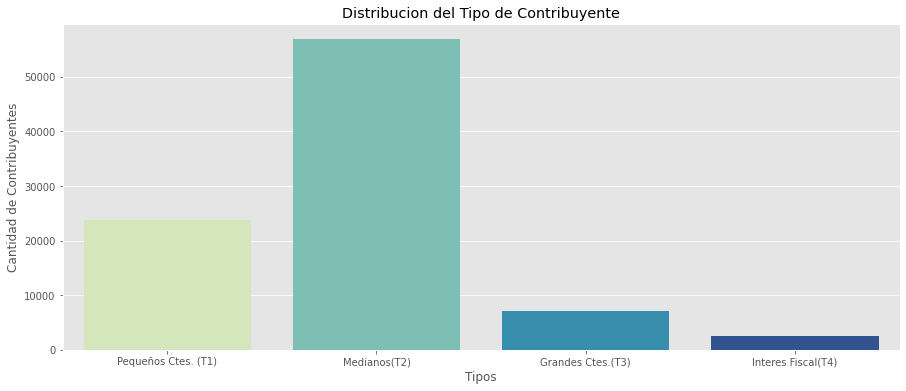

In [ ]:
x = ["Pequeños Ctes. (T1)","Medianos(T2)","Grandes Ctes.(T3)","Interes Fiscal(T4)"]
y=[len(Tipo_1.values),len(Tipo_2.values),len(Tipo_3.values),len(Tipo_4.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,palette="YlGnBu")
plt.title("Distribucion del Tipo de Contribuyente")
plt.xlabel ("Tipos")
plt.ylabel("Cantidad de Contribuyentes")
plt.show()

Los datos utilizados tienen una gran ponderación para el subconjunto de la población correspondiente a los Contribuyentes Tipo 2

In [ ]:
df_tipos=df_cabecera[df_cabecera['Tipo_Comercio'] > 4]
df_tipos.Tipo_Comercio.value_counts()

9    431
5    125
7      1
Name: Tipo_Comercio, dtype: int64

In [ ]:
df_cabecera = df_cabecera.drop(df_cabecera[df_cabecera.Tipo_Comercio > 4].index) 

Por lo tanto, se conservan unicamente aquellas observaciones donde el Tipo de Comercio varie en un rango de 1 a 4 y se filtran los registros con valores superiores, para proceder a eliminarlos. 

In [ ]:
df_casa_central = df_cabecera[df_cabecera['CODCOMERCIO']== 0]
df_casa_central.shape
#df_casa_central.head()

(0, 30)

### Barrios con la mayor cantidad de comercios del Municipio

In [ ]:
df_barrios_populares = pd.DataFrame(df_cabecera.Descrip_Barrio.value_counts()) 
df_barrios_mas_populares = df_barrios_populares.head(12)
df_barrios_mas_populares.head(20)

,Descrip_Barrio
CENTRO,13888
NUEVA CORDOBA,5272
ALBERDI,3323
ALTA CORDOBA,3033
ALTO ALBERDI,2966
GENERAL PAZ,2509
ARGUELLO,1994
C.DE LAS ROSAS,1867
SAN VICENTE,1800
GRAL.PUEYRREDON,1751


In [ ]:
df_barrios_mas_populares.rename(columns={'Descrip_Barrio':'Barrio'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


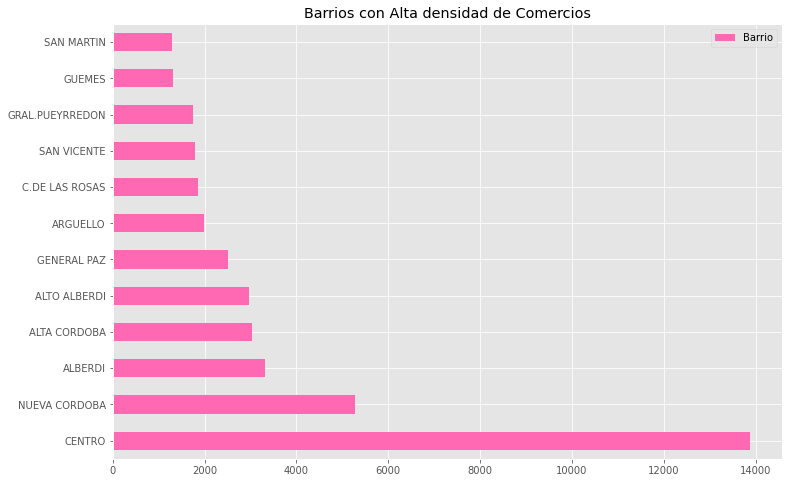

In [ ]:
df_barrios_mas_populares.plot.barh(color='hotpink', figsize=(12,8), title='Barrios con Alta densidad de Comercios')

In [ ]:
df_cabecera[df_cabecera['Cod_CPC'] == '  ']

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal,Cod_CPC


In [ ]:
df_cabecera['Cod_CPC'].value_counts()

10    25864
01    11527
03    10431
07     9004
08     8843
04     7335
06     7089
02     5274
05     4241
00      421
09       21
Name: Cod_CPC, dtype: int64

In [ ]:
#10: Mercado de la Ciudad. 01: Centro América. 03: Arguello.

In [ ]:
df_cabecera.groupby('Cod_CPC')['CUIT'].size()

Cod_CPC
00      421
01    11527
02     5274
03    10431
04     7335
05     4241
06     7089
07     9004
08     8843
09       21
10    25864
Name: CUIT, dtype: int64

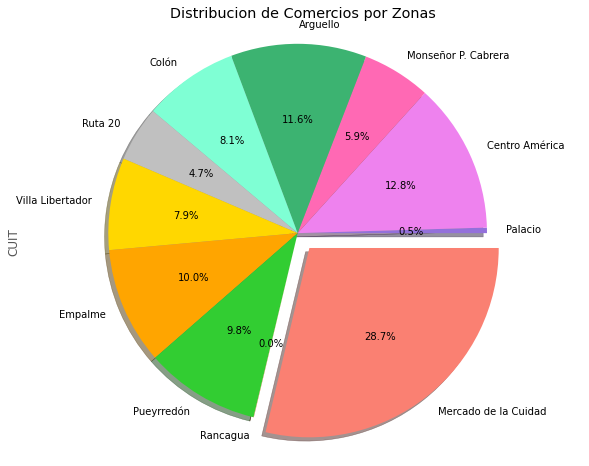

In [ ]:
explode_vals = [0,0,0,0,0,0,0,0,0,0,0.1]
etiquetas = ['Palacio','Centro América','Monseñor P. Cabrera','Arguello','Colón','Ruta 20','Villa Libertador','Empalme','Pueyrredón','Rancagua','Mercado de la Cuidad','Guiñazú']
colores = ['mediumpurple','violet','hotpink','mediumseagreen','aquamarine','silver','gold','orange','limegreen','chocolate','salmon']
plt.figure(figsize=(10,8))
df_cabecera.groupby('Cod_CPC')['CUIT'].size().plot(kind='pie', labels= etiquetas, shadow = True, autopct='%0.1f%%', explode=explode_vals, colors=colores)
plt.title('Distribucion de Comercios por Zonas')
plt.axis("equal")
plt.show()

Text(0, 0.5, 'Cant. de Comercios')

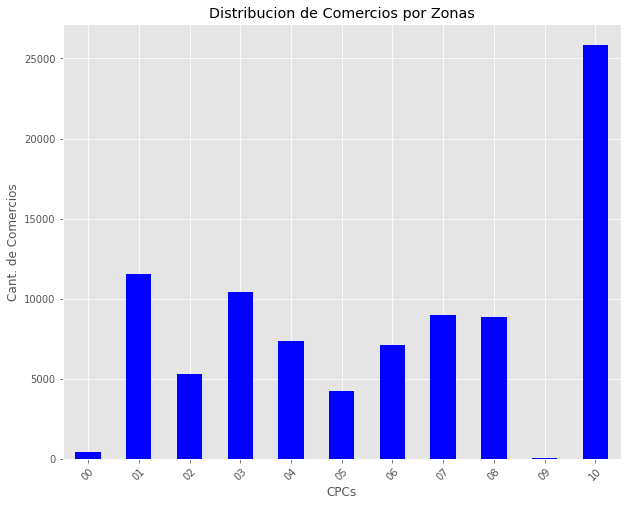

In [ ]:
plt.figure(figsize=(10,8))
df_cabecera.groupby('Cod_CPC')['CUIT'].size().plot(kind='bar', color= 'blue') 
plt.title('Distribucion de Comercios por Zonas')
plt.xlabel('CPCs')
plt.xticks(rotation=45)
plt.ylabel('Cant. de Comercios')

Al observar el grafico podemos ver que la zona donde se agrupan la mayor cantidad de comercios, se corresponde con la abarcada por el CPC Mercado de la Ciudad

In [ ]:
df_cabecera.Cod_CPC.unique()

array(['08', '06', '07', '10', '03', '00', '01', '04', '02', '05', nan,
       '09'], dtype=object)

In [ ]:
df_cabecera.Cod_CPC.value_counts() #00 Palacio

10    25864
01    11527
03    10431
07     9004
08     8843
04     7335
06     7089
02     5274
05     4241
00      421
09       21
Name: Cod_CPC, dtype: int64

In [ ]:
df_comercios = pd.DataFrame(df_cabecera.groupby('Cod_CPC')['CUIT'].size()) 
df_comercios

,CUIT
Cod_CPC,
00,421
01,11527
02,5274
03,10431
04,7335
05,4241
06,7089
07,9004
08,8843


In [ ]:
df_comercios.rename(columns={'Cod_CPC':'Cpcs'}, inplace=True)

Text(0, 0.5, 'CPCs')

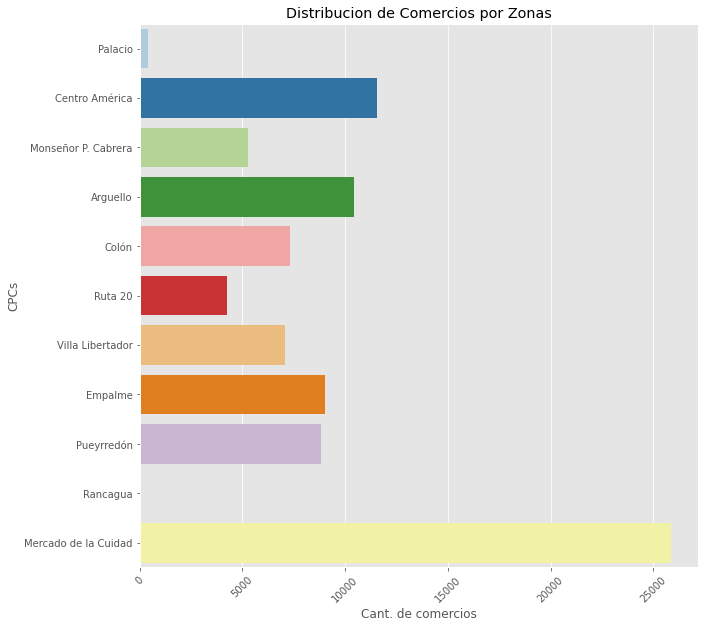

In [ ]:
x=df_comercios.CUIT
y = ['Palacio','Centro América','Monseñor P. Cabrera','Arguello','Colón','Ruta 20','Villa Libertador','Empalme','Pueyrredón','Rancagua','Mercado de la Cuidad']
#df_cabecera.groupby('Cod_CPC')['CUIT'].size().plot(kind='barh', x=x, y=y, color= 'violet', figsize=(15,10))
plt.figure(figsize=(10,10))
sns.barplot(x=x, y=y, palette='Paired')
plt.title('Distribucion de Comercios por Zonas')
plt.xlabel('Cant. de comercios')
plt.xticks(rotation=45)
plt.ylabel('CPCs')

Text(0, 0.5, 'CPCs')

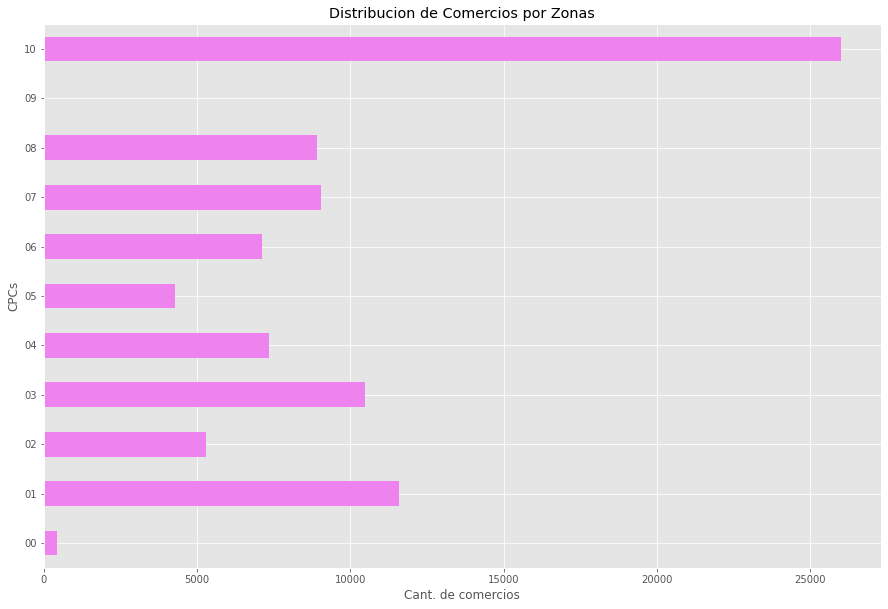

In [ ]:
etiquetas = ['Palacio','Centro América','Monseñor P. Cabrera','Arguello','Colón','Ruta 20','Villa Libertador','Empalme','Pueyrredón','Rancagua','Mercado de la Cuidad']
df_cabecera.groupby('Cod_CPC')['CUIT'].size().plot(kind='barh', x=etiquetas, color= 'violet', figsize=(15,10))
#grouped = df_cabecera.groupby('Cod_CPC')['CUIT'].size().plot(x=etiquetas, kind='barh', color= 'violet', figsize=(15,10))#cambiar escala y colocar nombre a los cpc
plt.title('Distribucion de Comercios por Zonas')
plt.xlabel('Cant. de comercios')
plt.ylabel('CPCs')


In [ ]:
df_cabecera[df_cabecera['Cod_CPC']== '09'].shape

(21, 30)

In [ ]:
df_cabecera.Categ_Rubro.unique()

array(['13', '12', '01', '05', '14', '16', '08', '11', '10', '15', '02',
       '07', '09', '03', '04', '06', '00'], dtype=object)

In [ ]:
df_cabecera['Categ_Rubro'].value_counts() #16 Nulos

01    44478
13    17118
16    12697
02     3791
05     2990
14     2841
12     2472
15     1539
08     1294
11      412
10      293
09      247
06      171
04      160
03      149
00      116
--       89
07        9
Name: Categ_Rubro, dtype: int64

In [ ]:
df_cabecera = df_cabecera.dropna(subset=['Categ_Rubro']) #eliminar los nulos de dicha columna

In [ ]:
df_cabecera = df_cabecera.drop(df_cabecera[df_cabecera["Categ_Rubro"] == '--'].index) #elimina los registros --

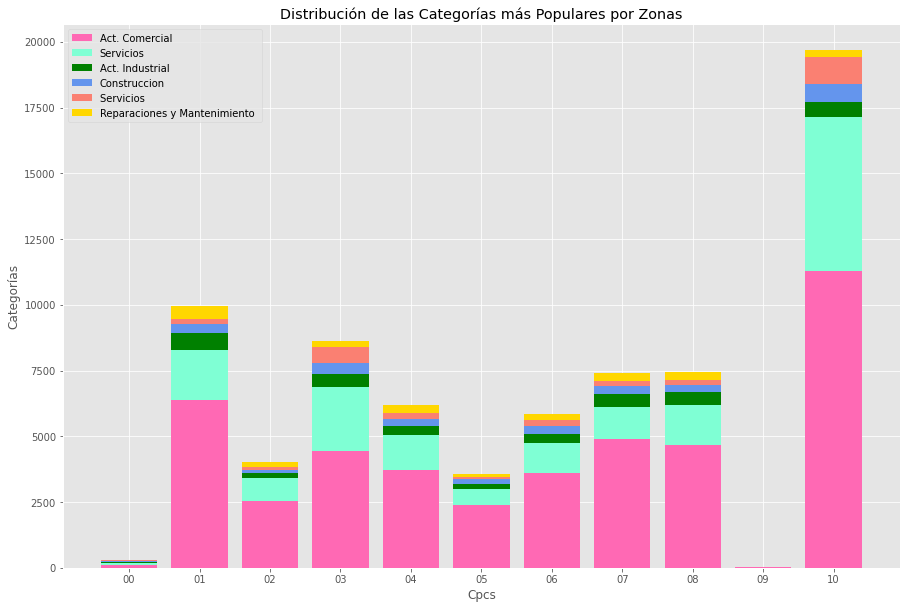

In [ ]:
grupos= ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
cate_1 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='01')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='01')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='01')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='01')].shape[0]]
cate_13 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='13')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='13')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='13')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='13')].shape[0]]
#cate_16 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='16')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='16')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='16')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='16')].shape[0]]
cate_2 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='02')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='02')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='02')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='02')].shape[0]]
cate_5 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='05')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='05')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='05')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='05')].shape[0]]
cate_14 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='14')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='14')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='14')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='14')].shape[0]]
cate_12 = [df_cabecera[(df_cabecera['Cod_CPC']=='00') & (df_cabecera['Categ_Rubro']=='12')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='01') & (df_cabecera['Categ_Rubro']=='12')].shape[0], df_cabecera[(df_cabecera['Cod_CPC']=='02') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='03') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='04') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='05') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='06') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='07') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='08') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='09') & (df_cabecera['Categ_Rubro']=='12')].shape[0],df_cabecera[(df_cabecera['Cod_CPC']=='10') & (df_cabecera['Categ_Rubro']=='12')].shape[0]]

indice = np.arange(len(grupos))
plt.figure(figsize=(15,10))

plt.bar(indice, cate_1, color="hotpink", label='Act. Comercial')
plt.bar(indice, cate_13, color="aquamarine", label='Servicios',  bottom=np.array(cate_1))
plt.bar(indice, cate_2, color="green", label='Act. Industrial',  bottom=np.array(cate_1)+np.array(cate_13))
plt.bar(indice, cate_5, color="cornflowerblue", label='Construccion',  bottom=np.array(cate_1)+np.array(cate_13)+np.array(cate_2))
plt.bar(indice, cate_14, color="salmon", label='Servicios ',  bottom=np.array(cate_1)+np.array(cate_13)+np.array(cate_2)+np.array(cate_5))
plt.bar(indice, cate_12, color="gold", label='Reparaciones y Mantenimiento ',  bottom=np.array(cate_1)+np.array(cate_13)+np.array(cate_2)+np.array(cate_5)+np.array(cate_14))

plt.xticks(indice, grupos)
plt.ylabel("Categorías")
plt.xlabel("Cpcs")
plt.title('Distribución de las Categorías más Populares por Zonas')
plt.legend()
 
plt.show()


In [ ]:
df_cabecera[df_cabecera['Cod_CPC'] == '10']['Categ_Rubro'].value_counts(normalize=True)

01   0.542
13   0.281
14   0.049
05   0.033
02   0.027
08   0.023
12   0.013
10   0.012
15   0.006
11   0.005
04   0.003
09   0.002
03   0.001
00   0.001
06   0.001
07   0.000
Name: Categ_Rubro, dtype: float64

ValueError: ignored

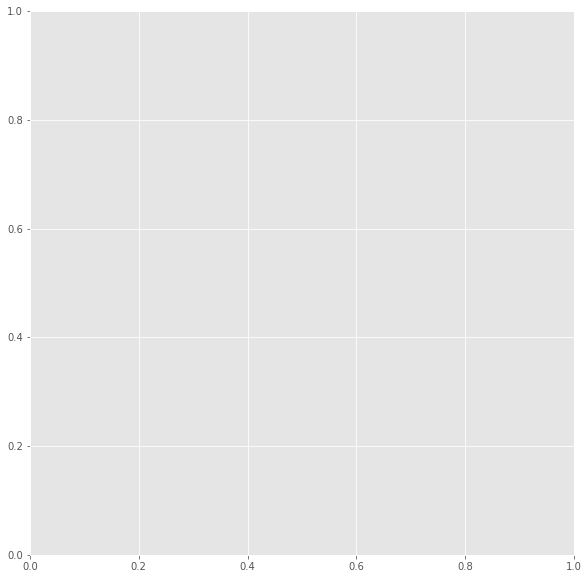

In [ ]:
explode_vals = [0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(15,10))
rubro = ['Act Comercial','Servicios','Sin datos','Servicios ','Construccion','Act Industrial','Entidades Financieras','Reparaciones y Mantenimiento','Playas de estacionamiento','Transporte','Publicidad','Comunicaciones','Locacion de Bienes muebles','Act Primaria','00','Deposito y almacenamiento','Electricidad, gas y similares']
plt.pie(df_cabecera[df_cabecera['Cod_CPC'] == '10']['Categ_Rubro'].value_counts(),labels=rubro)
plt.title('Distribucion de Rubros en Zona Centro')
plt.axis("equal")
#plt.xticks(rotation=45)
plt.show()

In [ ]:
df_rubros_cpc10 = pd.DataFrame(df_cabecera[df_cabecera['Cod_CPC'] == '10']['Categ_Rubro'].value_counts())
df_rubros_cpc10

,Categ_Rubro
01,11296
13,5846
16,5013
14,1013
05,686
02,571
08,470
12,273
10,253
15,130


In [ ]:
df_rubros_cpc10.rename(columns={'Categ_Rubro':'Rubro'}, inplace=True)

Text(0, 0.5, 'Rubro')

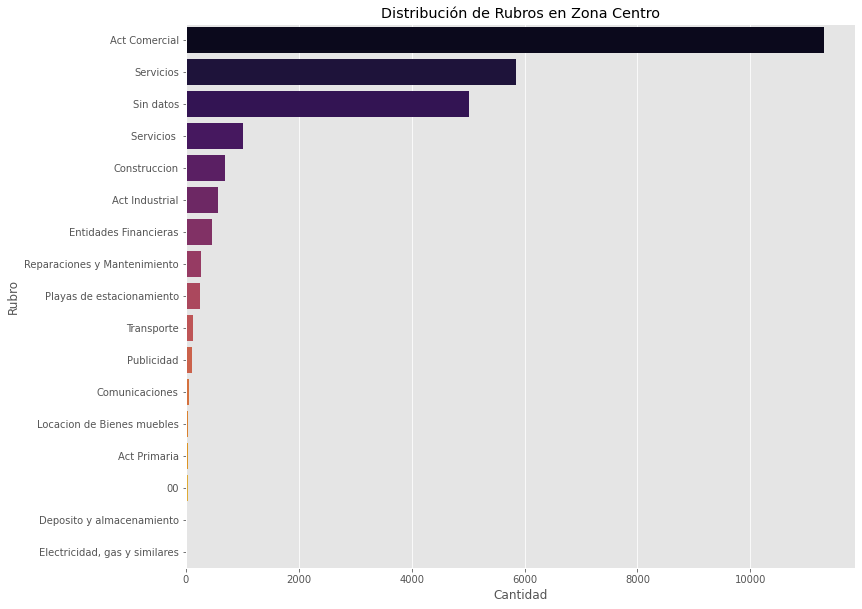

In [ ]:
x=df_rubros_cpc10.Rubro
y=['Act Comercial','Servicios','Sin datos','Servicios ','Construccion','Act Industrial','Entidades Financieras','Reparaciones y Mantenimiento','Playas de estacionamiento','Transporte','Publicidad','Comunicaciones','Locacion de Bienes muebles','Act Primaria','00','Deposito y almacenamiento','Electricidad, gas y similares']
plt.figure(figsize=(12,10))
sns.barplot(x=x, y=y, palette='inferno')
plt.title('Distribución de Rubros en Zona Centro')
plt.xlabel('Cantidad')
plt.ylabel('Rubro')

Text(0, 0.5, 'Cantidad')

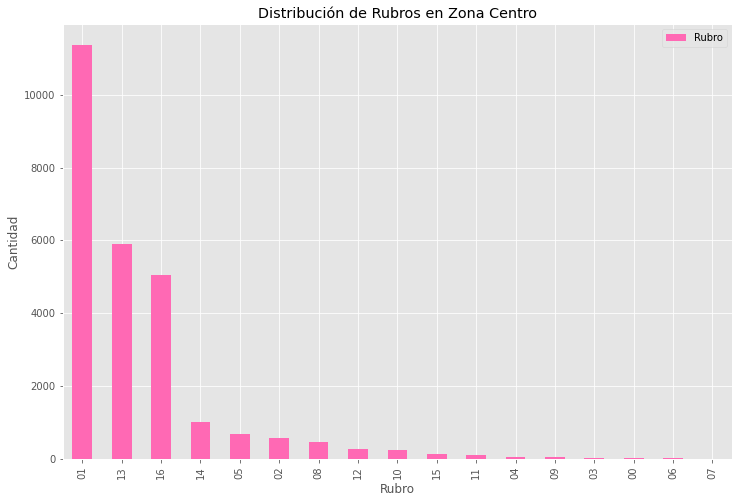

In [ ]:
df_rubros_cpc10.plot.bar(color='hotpink', figsize=(12,8), title='Distribución de Rubros en Zona Centro')
plt.xlabel('Rubro')
plt.ylabel('Cantidad')

In [ ]:
#Reordenar los indices
df_detalle.reset_index(drop=True,inplace=True)

In [ ]:
df_cabecera['Anio_Inicio'] = df_cabecera.Fecha_Inicio.dt.year

In [ ]:
columnas = list(df_cabecera.columns)
columnas

['CODCOMERCIO',
 'CUIT',
 'Razon_Social',
 'Tipo_Comercio',
 'Fecha_Inicio',
 'Fecha_Cese',
 'Calle',
 'Numero',
 'Piso',
 'Dpto',
 'Cod_Barrio',
 'Descrip_Barrio',
 'Designacion_Catastral',
 'Cantidad_Sucu',
 'Codigo_Seccional',
 'Estado',
 'Cod_ConvMulti',
 'Tipo_Entidad',
 'Fecha_Cambio_Dom',
 'Nombre_Fantasia',
 'Cod_Monotrib',
 'RUBRO',
 'SUBRUBRO',
 'Descrip_Rubro',
 'Categ_Rubro',
 'Fecha_Alta_Rubro',
 'Fecha_Baja_Rubro',
 'Descrip_Barrio_y',
 'Cod_Postal',
 'Cod_CPC',
 'Anio_Inicio']

In [ ]:
contador = df_cabecera.Anio_Inicio.value_counts(sort=True)
print (contador)
#print ("El Año con mas comercios es: ", str(contador[0]))
print (contador.keys()[0])

2017    7145
2018    6746
2007    6490
2011    6249
2016    6202
2008    6164
2019    6131
2012    5970
2010    5961
2006    5864
2015    5861
2013    5859
2009    5324
2014    5299
2005    5084
2020     428
Name: Anio_Inicio, dtype: int64
2017


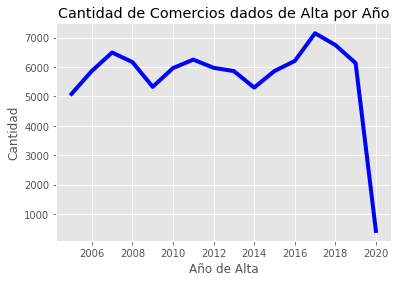

In [ ]:
# Cantidad de comercios dados de Alta por año 
df_cabecera.Anio_Inicio.value_counts().sort_index().plot(lw = 4,c='blue')
#plt.figure(figsize=(10,10))
plt.title("Cantidad de Comercios dados de Alta por Año")
plt.xlabel("Año de Alta")
plt.ylabel("Cantidad")
plt.show()

El Año donde se dieron de Alta la mayor cantidad de Comercios es: 2017

In [ ]:
df_detalle = df_detalle.drop (['Razon_Social','Piso','Dpto','Designacion_Catastral','Cantidad_Sucu','Codigo_Seccional','Cod_ConvMulti','Tipo_Entidad','Fecha_Cambio_Dom','Nombre_Fantasia','Cod_Monotrib'], axis=1)

In [ ]:
Ctes_pequeños= df_cabecera[df_cabecera.Tipo_Comercio==1] 
Ctes_medianos= df_cabecera[df_cabecera.Tipo_Comercio==2] 
Ctes_grandes= df_cabecera[df_cabecera.Tipo_Comercio==3] 
Ctes_interes_fis= df_cabecera[df_cabecera.Tipo_Comercio==4] 

In [ ]:
Ctes_grandes.shape

(1658, 29)

# Relacion entre el Tipo de Comercio y Cantidad Total de Comercios dados de Alta 

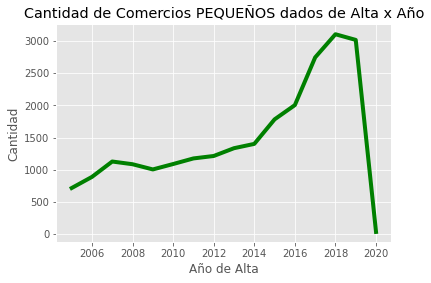

In [ ]:
Tipo_1.Anio_Inicio.value_counts().sort_index().plot(lw = 4,c='green')  
plt.title("Cantidad de Comercios PEQUEÑOS dados de Alta x Año")
plt.xlabel("Año de Alta")
plt.ylabel("Cantidad")
plt.show()

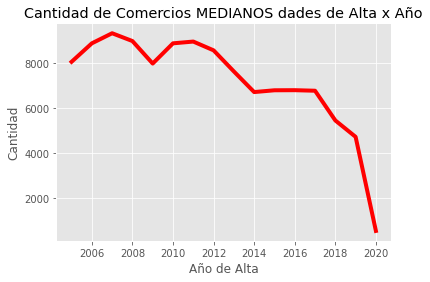

In [ ]:
Tipo_2.Anio_Inicio.value_counts().sort_index().plot(lw = 4,c='red')
plt.title("Cantidad de Comercios MEDIANOS dados de Alta x Año")
plt.xlabel("Año de Alta")
plt.ylabel("Cantidad")
plt.show()

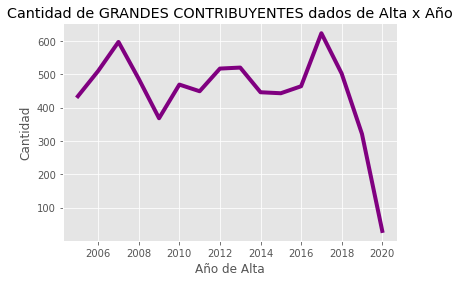

In [ ]:
Tipo_3.Anio_Inicio.value_counts().sort_index().plot(lw = 4,c='purple')
plt.title("Cantidad de GRANDES CONTRIBUYENTES dados de Alta x Año")
plt.xlabel("Año de Alta")
plt.ylabel("Cantidad")
plt.show()

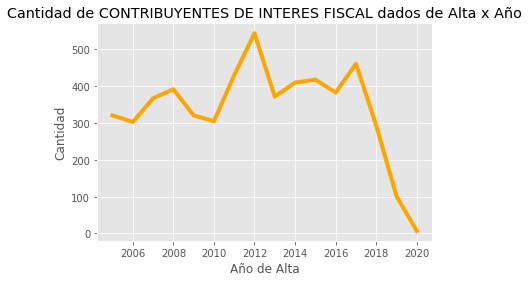

In [ ]:
Tipo_4.Anio_Inicio.value_counts().sort_index().plot(lw = 4,c='orange')
plt.title("Cantidad de CONTRIBUYENTES DE INTERES FISCAL dados de Alta x Año")
plt.xlabel("Año de Alta")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
df_cabecera.Tipo_Comercio.value_counts()

2    57079
1    23781
3     7206
4     2511
Name: Tipo_Comercio, dtype: int64

In [ ]:
Tipo_1.groupby('Cod_CPC').size()

Cod_CPC
00      57
01    3208
02    1453
03    2715
04    2221
05    1300
06    2026
07    2508
08    2501
09      11
10    5647
dtype: int64

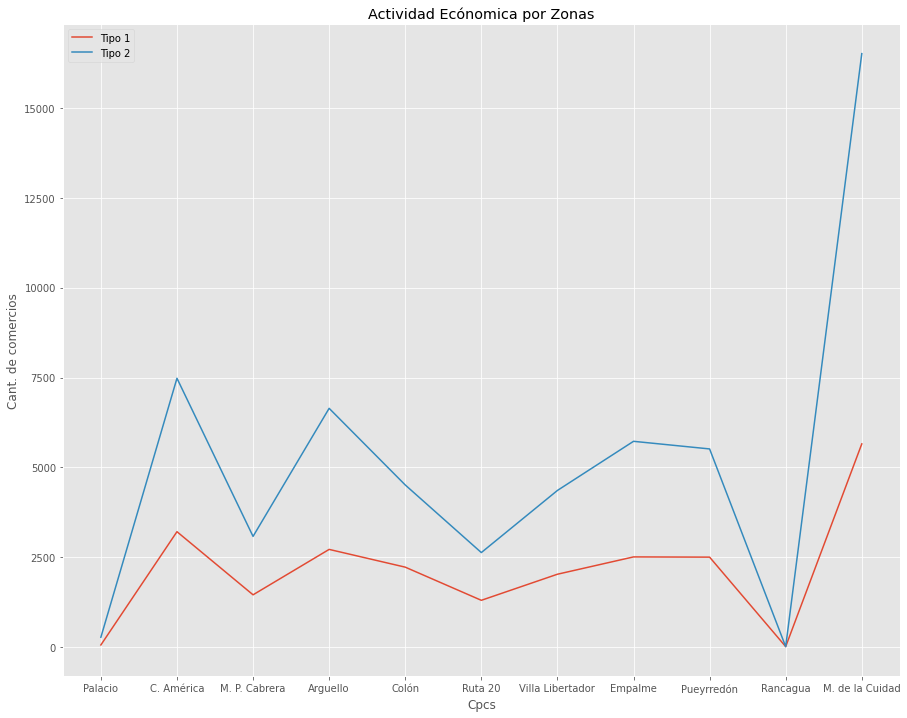

In [ ]:
x = ['Palacio','C. América','M. P. Cabrera','Arguello','Colón','Ruta 20','Villa Libertador','Empalme','Pueyrredón','Rancagua','M. de la Cuidad']
y1 = Tipo_1.groupby('Cod_CPC').size()
y2 = Tipo_2.groupby('Cod_CPC').size()
plt.figure(figsize=(15,12))
plt.plot(x, y1, label="Tipo 1")
plt.plot(x, y2, label="Tipo 2")
plt.plot()
plt.xlabel("Cpcs")
plt.ylabel("Cant. de comercios")
plt.title("Actividad Ecónomica por Zonas")
plt.legend()
plt.show()

Text(0, 0.5, 'Cant. de comercios')

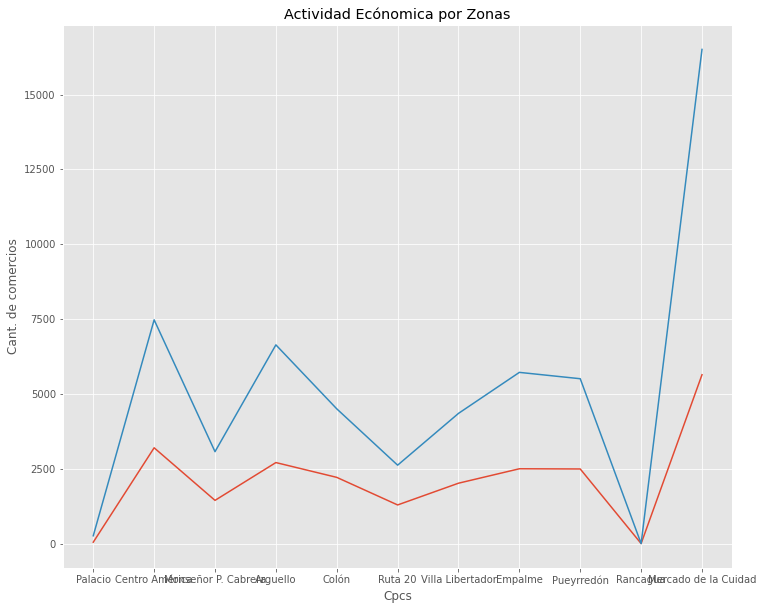

In [ ]:
from seaborn.relational import lineplot
x = ['Palacio','Centro América','Monseñor P. Cabrera','Arguello','Colón','Ruta 20','Villa Libertador','Empalme','Pueyrredón','Rancagua','Mercado de la Cuidad']
y1=Tipo_1.groupby('Cod_CPC').size()
y2=Tipo_2.groupby('Cod_CPC').size()
#y3=Tipo_3.groupby('Cod_CPC').size()
#y4=Tipo_4.groupby('Cod_CPC').size()
plt.figure(figsize=(12,10))
sns.lineplot(x=x, y=y1)
sns.lineplot(x=x, y=y2)
#sns.lineplot(x=x, y=y3)
#sns.lineplot(x=x, y=y4)
plt.title('Actividad Ecónomica por Zonas')
plt.xlabel('Cpcs')
plt.ylabel('Cant. de comercios')

In [ ]:
df_cabecera

,CODCOMERCIO,CUIT,Razon_Social,Tipo_Comercio,Fecha_Inicio,Fecha_Cese,Calle,Numero,Piso,Dpto,Cod_Barrio,Descrip_Barrio,Designacion_Catastral,Cantidad_Sucu,Codigo_Seccional,Estado,Cod_ConvMulti,Tipo_Entidad,Fecha_Cambio_Dom,Nombre_Fantasia,Cod_Monotrib,RUBRO,SUBRUBRO,Descrip_Rubro,Categ_Rubro,Fecha_Alta_Rubro,Fecha_Baja_Rubro,Descrip_Barrio_y,Cod_Postal,Cod_CPC
0,0,20000708748,224089644BOBER PABLO LUIS,2,2012-08-01,NaT,GARIBALDI,00318,,,081,GENERAL PAZ,12704501900000,0,00,5,0,0,NaT,224089644BOBER PABLO LUIS ...,,911000,0,SERVICIOS PRESTAD A LA EMPRE NO CLASIF EN OTRA...,13,2012-08-01,NaT,GENERAL PAZ,05000,08
1,0,20007763426,RODRIGUEZ ROJAS MACEDONIO,2,2013-11-19,NaT,ARMADA ARGENTINA,00983,,,181,PARQUE LATINO,300900400300000,0,00,5,0,0,NaT,RODRIGUEZ ROJAS MACEDONIO ...,,502210,0,TALLER DE GOMERIA. ...,12,2013-11-19,NaT,PARQUE LATINO,05016,06
2,0,20017056361,SAQUI CARLOS ALBERTO,2,2016-06-01,NaT,AV MANUEL SAVIO,04125,,,493,4 DE FEBRERO,261400205300000,0,00,5,0,0,NaT,SAQUI CARLOS ALBERTO ...,,523690,2,VTA/MENOR DE MAT.DE CONSTRUCCION ...,01,2016-06-01,NaT,4 DE FEBRERO,05014,07
3,0,20018193605,USTARES MARCELO EDMUNDO,2,2006-02-02,NaT,CHUBUT,00047,,,004,ALBERDI,40104601300000,0,00,5,0,0,NaT,...,,526909,5,SERVICIO DE REPARACIONES N.C.P. ...,13,2006-02-02,NaT,ALBERDI,05000,10
4,0,20027130993,PALACIOS AURELIO,2,2005-09-01,NaT,AV COLON,00010,02,32,047,CENTRO,40204901700032,0,00,5,0,0,NaT,...,,452900,0,OBRAS DE INGENIERIA CIVIL N.C.P. ...,05,2005-09-01,NaT,CENTRO,05000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185079,3,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2006-05-22,NaT,CAMPILLO,00346,,,381,COFICO,0,0,00,1,0,6,NaT,...,,000000,0,NaN,16,NaT,NaT,COFICO,05000,01
185080,4,34546198105,DIREC. DE ASIST. SOCIAL UNC,2,2016-11-10,NaT,SANTA ROSA,01047,,,004,ALBERDI,40102900200000,0,00,1,0,6,NaT,...,,000000,0,NaN,16,NaT,NaT,ALBERDI,05000,10
185081,2,34557619099,PUMA SPORTS ARGENTINA SA,3,2005-07-11,2011-02-28,BV. JOSE M ESTRADA,80,,,162,NUEVA CORDOBA,41200307600000,0,00,1,1,1,NaT,PUMA ...,,000000,0,NaN,16,NaT,NaT,NUEVA CORDOBA,05000,10
185082,4,34557619099,PUMA SPORTS ARGENTINA SA,3,2007-12-19,2008-01-31,JOSE DE GOYECHEA,02851,001,098,273,VILLA CABRERA,51102901400001,0,00,1,1,1,NaT,PUMA ...,,000000,0,NaN,16,NaT,NaT,VILLA CABRERA,05009,02


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

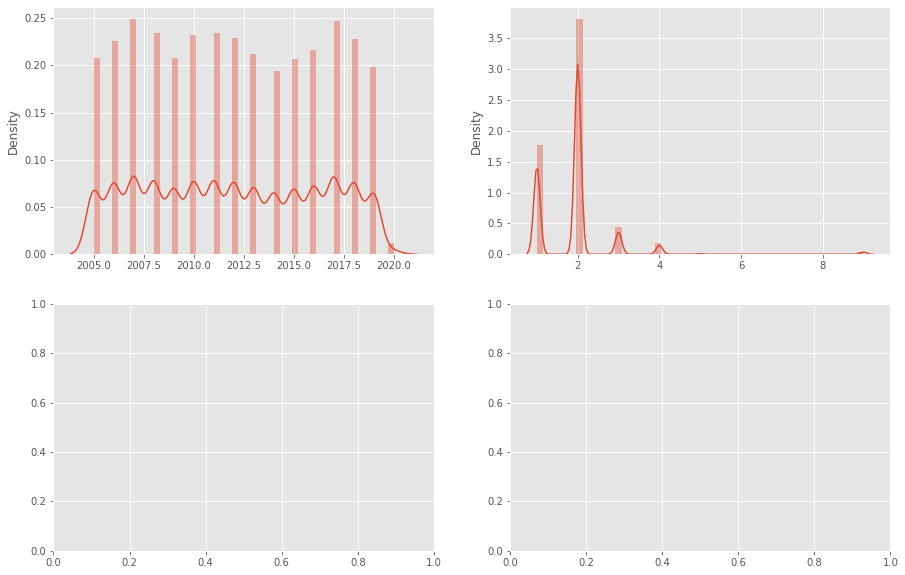

In [ ]:
figura, graficos = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.distplot(x=df_detalle.Anio_Inicio, ax=graficos[0][0])
sns.distplot(x=df_detalle['Tipo_Comercio'], ax=graficos[0][1])
#sns.distplot(x=df_detalle['Descrip_Barrio'], ax=graficos[1][0])
sns.distplot(x=df_detalle['Cod_Barrio'], ax=graficos[1][0])

#Añadir títulos
graficos[0][0].set_title('Año Alta del Comercio')
graficos[0][1].set_title('Tipo Contribuyente')
graficos[1][0].set_title('Barrios');

### Analisis con Pandas ProfileReport

Para un **Análisis exploratorio inicial** de los datos se utilizará el modulo ProfileReport de Pandas. Esta herramienta genera un análisis de variables, interacciones, correlaciones y faltantes, de una manera fácil y rápida, además permite generar informes interactivos en formato web, para ayudarnos a visualizar y entender la distribución de dichas variables. 

In [ ]:
# El reporte se muestra en un archivo web!! 
from pandas_profiling import ProfileReport
#Solo utilizamos los primeros 10000 datos
prof = ProfileReport(df_cabecera.sample(n=10000)) 
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_query.sample(n=5000), title='Exploratory Analysis',html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# export analysis results to an html page, for sharing to a wider audience and non-Jupyter users.
profile.to_file('Archivo.html')

In [ ]:
df_casa_central.head(10)

CUIT         Codigo_Seccional
20000708748  00                  1
20007763426  00                  1
20017056361  00                  1
20018193605  00                  1
20027130993  00                  1
20027434070  00                  1
20027821058  00                  1
20027839550  00                  1
20027859616  00                  1
20027950516  00                  1
Name: Codigo_Seccional, dtype: int64

In [ ]:
from pandas.core.frame import DataFrame
df_casa_central = DataFrame(df_casa_central)
df_casa_central.head()

,,COSECC
CUIT,COSECC,
20000708748,00,1
20007763426,00,1
20017056361,00,1
20018193605,00,1
20027130993,00,1


In [ ]:
df_casa_central.shape

(78486, 1)

In [ ]:
df_casa_central.COSECC.value_counts()

1     35996
2     20301
3      9897
4      5316
5      2769
6      1649
7       891
8       613
9       348
10      232
11      138
12       88
13       60
14       56
15       29
16       24
17       17
18       13
20        7
22        6
21        4
19        4
29        3
25        3
23        3
26        3
24        3
37        2
46        2
27        1
44        1
45        1
28        1
33        1
42        1
34        1
58        1
32        1
Name: COSECC, dtype: int64

In [ ]:
df["COSECC"].value_counts()

00    284593
      126261
13     14321
14     13345
01     12828
       ...  
44         2
28         1
60         1
39         1
98         1
Name: COSECC, Length: 62, dtype: int64


Cantidad de comercios por Codigo de actividad

In [ ]:
df["COCACT"].value_counts()

1     205113
5     124345
3      49748
10     36328
4      36267
7      33763
2      18859
8      12955
9        678
6        205
          19
T          4
Name: COCACT, dtype: int64

1:Activo, 2: Cte. no ubic., 3: Cese Tramite, 4: Inactivo, 5: Sin Act.U.P., 6: Quiebra, 7: Transferencia, 8: No ubic e Inspec, 9: Transferencia por error de CUIT, 10: Cese Definitivo

### Mortalidad de las empresas, tanto por año, como por tipo de actividad.

Cantidad de comercios por Tipo de Actividad 

In [ ]:
df["CATEGORIARUBRO"].value_counts()

0     260668
1     129867
13     55520
99     21811
2      13615
14      7740
12      6114
5       4980
15      3668
8       3238
4       2463
11      2114
6       2068
10      1561
3        846
9        801
7         58
Name: CATEGORIARUBRO, dtype: int64

In [ ]:
df = df.astype({'CATEGORIARUBRO': 'int'})

In [ ]:
#temp = df('CATEGORIARUBRO').value_counts().sort_values(by='CATEGORIARUBRO',ascending=True)
temp = df["CATEGORIARUBRO"].value_counts()
temp

0     260668
1     129867
13     55520
99     21811
2      13615
14      7740
12      6114
5       4980
15      3668
8       3238
4       2463
11      2114
6       2068
10      1561
3        846
9        801
7         58
Name: CATEGORIARUBRO, dtype: int64

1:Act Comercial, 2: Act Industrial, 3:Act Primaria, 4:Comunicaciones, 5:Construccion, 6:Deposito y almacenamiento, 7:Electricidad, gas y similares, 8:Entidades Financieras, 9:Locacion de Bienes muebles, 10:Playas de estacionamiento, 11:Publicidad, 12:Reparaciones y Mantenimiento, 13:Servicios, 14:Servicios inmobiliarios, 15:Transporte

Cantidad de comercios por barrio/zonas
- Ver comercios activos & comercios con cese 

Edad promedio de los Comercios (hay que calcularlo con fecha_alta)

In [ ]:
# esta fn no se ejecuto
def control_fechas_nulas(df):
    #for i in df.index:
    for i in range(len(df)):
     # if (df.loc[i,"Fecha_Cese"] == '00000000'): 
     #   print('paso por if')
      #if (df["Fecha_Cese"][i] == '00000000'):
        #df["Fecha_Cese"][i] = df["Fecha_Cese"].replace(['00000000'],'0000-00-00')   
    #  else:
       df.loc[i,"Fecha_Cese"] = pd.to_datetime(df['Fecha_Cese'][i],format='%Y%m%d', errors='coerce')     
    return df
    

In [ ]:
%time df_detalle = control_fechas_nulas(df_detalle)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
